# Contents <a id='back'></a>

* [Introduction](#intro)
* [1. Data Overview](#data_review)
    * [Conclusions](#data_review_conclusions)
* [2. Data Pre-Processing](#data_preprocessing)
    * [2.1 Working with Missing Values](#missing_values)
    * [2.2 Fixing Data Types](#data_types)
    * [2.3 Adding new column](#new_column)
    * [2.4 Correlation Matrix](#corr_matrix)
    * [2.5 Checking Outliers](#check_outliers)
    * [2.6 Define Lower Bound and Upper Bound](#lower_upper_bound)
    * [2.7 Dataset without outliers](#dataset_without_outliers)
    * [2.8 Diagram for Dataset with Outliers and Dataset Without Outliers](#diagram_2_datasets)
* [3. Data Analysis](#analyze)
    * [3.1 Ad Duration](#ad_duration)
    * [3.2 Average Price for Each Vehicle Type](#avg_price)
    * [3.3 Most Influential Factors on the vehicle's price](#influential_factors)
* [General Conclusion](#end)

# Introduction <a id='intro'></a>

In this project, I will analyze the factors that influence the price of a vehicle in the listings of vehicle advertisements on the website.

Objective:

1. Analyze ad duration
2.  Analyze the number of ads and the average price for each type of vehicle. 
3. Analyze what factors that most influence the price of a vehicle.


This project will consist of three steps:

1. Data Overview
2. Data Preprocessing
3. Data Analysis

[Back to Contents](#back)

## 1. Data Overview <a id='data_review'></a>

[Back to Contents](#back)

In [2]:
# load the library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

In [3]:
# load the data
path = 'data/vehicles_us.csv'
df = pd.read_csv(path)

In [4]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [6]:
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [7]:
df.sample(frac = 0.25)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
12735,31922,2017.0,chevrolet silverado 1500,excellent,8.0,gas,22171.0,automatic,truck,white,1.0,2018-07-20,22
34215,7500,2005.0,ford f-150,excellent,8.0,gas,NaN,automatic,truck,black,NaN,2018-09-07,27
33324,19990,2010.0,ford f-350 sd,good,10.0,gas,51664.0,manual,truck,white,1.0,2019-03-05,53
16968,11995,2009.0,ram 1500,excellent,8.0,gas,141327.0,automatic,pickup,NaN,1.0,2018-09-10,69
20979,12905,2009.0,chevrolet tahoe,good,8.0,gas,118608.0,automatic,SUV,NaN,NaN,2018-11-08,156
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27924,4995,2008.0,honda cr-v,good,4.0,gas,286355.0,automatic,wagon,blue,NaN,2018-09-27,166
12787,17995,2011.0,chevrolet silverado 2500hd,excellent,8.0,gas,79000.0,automatic,truck,white,NaN,2018-11-25,13
10072,6495,2013.0,toyota prius,excellent,4.0,hybrid,176000.0,automatic,hatchback,blue,NaN,2019-03-20,32
36434,4950,2008.0,chevrolet trailblazer,good,6.0,gas,NaN,automatic,SUV,black,1.0,2018-07-20,81


**Findings:**

1. The type of "date_posted" is object. It should be datetime type.
2. The type "is4wd" is float. it should be boolean type.
3. The type of "model_year" and "cylinders" should be integer.
4. The type of "price" and "odometer" should be float.
5. There are missing values in the columns "model_year," "cylinders," "odometer," "paint_color," and "is_4wd."
6. Based on the minimum, mean, median, and maximum values, there is suspicion of outliers in the columns "Price" and "days_listed."

In [8]:
# and logic
df_missing_values = df.loc[(df['model_year'].isna()) | (df['cylinders'].isna()) | (df['odometer'].isna()) | (df['paint_color'].isna()) | (df['is_4wd'].isna())]
df_missing_values

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


In [9]:
# or logic
df.loc[(df['model_year'].isna()) & (df['cylinders'].isna()) & (df['odometer'].isna()) & (df['paint_color'].isna()) & (df['is_4wd'].isna())]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
19877,34900,NaN,mercedes-benz benze sprinter 2500,excellent,NaN,diesel,NaN,automatic,van,NaN,NaN,2018-10-16,44
20969,3000,NaN,ford focus,like new,NaN,diesel,NaN,automatic,sedan,NaN,NaN,2018-10-24,15
23376,3500,NaN,toyota 4runner,excellent,NaN,gas,NaN,automatic,SUV,NaN,NaN,2019-03-28,57
43039,4200,NaN,ford fusion,excellent,NaN,gas,NaN,automatic,sedan,NaN,NaN,2019-01-10,11


**Findings:**

from the filtered data using logic AND and OR, it can be concluded that missing values do not follow any specific pattern.

**Checking the Distribution in both datasets (the full dataset and the dataset containing missing values)**

In [10]:
# checking unique values for numerical columns in full dataset
columns_distribution = ['price', 'model_year', 'cylinders', 'odometer', 'is_4wd', 'days_listed']
for column in columns_distribution:
    print(column)
    print(sorted(df[column].unique()))
    print()

price
[1, 3, 5, 6, 9, 10, 11, 12, 15, 20, 24, 25, 28, 32, 35, 36, 39, 65, 69, 80, 85, 105, 111, 147, 155, 169, 171, 176, 179, 180, 185, 187, 188, 190, 195, 196, 197, 198, 199, 200, 204, 206, 211, 215, 222, 228, 233, 237, 243, 244, 245, 246, 247, 250, 253, 255, 257, 267, 276, 277, 279, 287, 288, 289, 292, 295, 298, 299, 300, 313, 320, 326, 340, 350, 351, 359, 371, 372, 384, 388, 399, 400, 422, 439, 450, 460, 472, 475, 483, 495, 500, 534, 550, 575, 580, 590, 599, 600, 650, 695, 699, 700, 725, 750, 795, 800, 850, 855, 875, 895, 899, 900, 950, 975, 995, 999, 1000, 1005, 1050, 1095, 1099, 1100, 1111, 1150, 1188, 1190, 1195, 1200, 1234, 1250, 1275, 1290, 1295, 1299, 1300, 1350, 1395, 1400, 1432, 1450, 1475, 1477, 1478, 1488, 1490, 1495, 1499, 1500, 1550, 1575, 1595, 1599, 1600, 1650, 1675, 1680, 1695, 1698, 1700, 1750, 1795, 1798, 1799, 1800, 1850, 1865, 1873, 1875, 1877, 1895, 1896, 1897, 1899, 1900, 1925, 1950, 1975, 1980, 1988, 1990, 1995, 1997, 1998, 1999, 2000, 2025, 2075, 2095, 2100, 2

In [11]:
# checking unique values for object columns in full dataset
columns_distribution = ['model', 'condition', 'fuel', 'transmission', 'type', 'paint_color', 'date_posted']
for column in columns_distribution:
    print(column)
    print(df[column].unique())
    print()

model
['bmw x5' 'ford f-150' 'hyundai sonata' 'chrysler 200' 'chrysler 300'
 'toyota camry' 'honda pilot' 'kia sorento' 'chevrolet silverado 1500'
 'honda accord' 'ram 1500' 'gmc yukon' 'jeep cherokee'
 'chevrolet traverse' 'hyundai elantra' 'chevrolet tahoe' 'toyota rav4'
 'chevrolet silverado' 'jeep wrangler' 'chevrolet malibu' 'ford fusion se'
 'chevrolet impala' 'chevrolet corvette' 'jeep liberty' 'toyota camry le'
 'nissan altima' 'subaru outback' 'toyota highlander' 'dodge charger'
 'toyota tacoma' 'chevrolet equinox' 'nissan rogue'
 'mercedes-benz benze sprinter 2500' 'honda cr-v' 'jeep grand cherokee'
 'toyota 4runner' 'ford focus' 'honda civic' 'kia soul'
 'chevrolet colorado' 'ford f150 supercrew cab xlt'
 'chevrolet camaro lt coupe 2d' 'chevrolet cruze' 'ford mustang'
 'chevrolet silverado 3500hd' 'nissan frontier crew cab sv'
 'subaru impreza' 'jeep grand cherokee laredo' 'nissan versa'
 'ford f-250 sd' 'chevrolet silverado 1500 crew' 'ford f250 super duty'
 'chevrolet cama

In [12]:
# checking unique values for numeric columns in dataset containing missing values
columns_distribution = ['price', 'model_year', 'cylinders', 'odometer', 'is_4wd', 'days_listed']
for column in columns_distribution:
    print(column)
    print(sorted(df_missing_values[column].unique()))
    print()

price
[1, 3, 5, 6, 10, 11, 12, 15, 20, 25, 32, 35, 39, 65, 69, 80, 85, 105, 111, 147, 155, 169, 171, 176, 179, 180, 185, 187, 188, 190, 195, 196, 197, 198, 199, 200, 204, 206, 211, 215, 222, 228, 233, 237, 243, 244, 245, 246, 247, 250, 253, 255, 257, 267, 276, 277, 279, 287, 288, 289, 292, 295, 298, 299, 300, 313, 320, 326, 340, 351, 359, 371, 388, 399, 400, 422, 439, 450, 460, 472, 475, 495, 500, 550, 575, 580, 599, 600, 650, 695, 699, 700, 725, 750, 795, 800, 850, 855, 875, 895, 899, 900, 950, 975, 995, 999, 1000, 1005, 1050, 1095, 1099, 1100, 1111, 1150, 1188, 1190, 1195, 1200, 1234, 1250, 1275, 1295, 1299, 1300, 1350, 1395, 1400, 1432, 1450, 1475, 1477, 1478, 1488, 1490, 1495, 1499, 1500, 1550, 1575, 1595, 1599, 1600, 1650, 1675, 1695, 1698, 1700, 1750, 1795, 1798, 1799, 1800, 1850, 1865, 1873, 1875, 1877, 1895, 1896, 1897, 1899, 1900, 1925, 1950, 1975, 1980, 1988, 1990, 1995, 1997, 1998, 1999, 2000, 2025, 2075, 2095, 2100, 2150, 2175, 2195, 2199, 2200, 2220, 2250, 2275, 2295, 2298

In [13]:
# checking unique values for object columns in dataset containing missing values
columns_distribution = ['model', 'condition', 'fuel', 'transmission', 'type', 'paint_color', 'date_posted']
for column in columns_distribution:
    print(column)
    print(df_missing_values[column].unique())
    print()

model
['bmw x5' 'ford f-150' 'hyundai sonata' 'chrysler 200' 'toyota camry'
 'kia sorento' 'honda pilot' 'honda accord' 'ram 1500' 'hyundai elantra'
 'chevrolet tahoe' 'toyota rav4' 'jeep wrangler' 'chevrolet malibu'
 'ford fusion se' 'chevrolet impala' 'chevrolet corvette'
 'toyota camry le' 'nissan altima' 'toyota highlander' 'dodge charger'
 'chrysler 300' 'toyota tacoma' 'nissan rogue'
 'mercedes-benz benze sprinter 2500' 'jeep grand cherokee'
 'toyota 4runner' 'ford focus' 'honda civic' 'kia soul'
 'chevrolet camaro lt coupe 2d' 'chevrolet cruze' 'ford mustang'
 'chevrolet silverado 3500hd' 'nissan frontier crew cab sv'
 'subaru impreza' 'nissan versa' 'chevrolet silverado 1500 crew'
 'ford f250 super duty' 'chevrolet camaro' 'ford mustang gt coupe 2d'
 'chevrolet colorado' 'chevrolet silverado' 'ford f150 supercrew cab xlt'
 'nissan maxima' 'chevrolet equinox' 'nissan sentra'
 'chevrolet silverado 1500' 'dodge grand caravan' 'ford taurus' 'acura tl'
 'ford f350 super duty' 'ford 

**Findings:**

1. 'price' column: There are outliers as there are prices that are too low, such as 1, 3, 5, 6, 9, etc., and there are prices that are too high, greater than 50,000 USD.
2. 'model' column: There are duplicate data.
3. 'odometer' column: There are outliers as there are values that are too low, such as 0.0, 1.0, etc.
4. 'date-posted' should be of type datetime, not object.
5. There are 'nan' values in the paint_color column.

In [14]:
# check missing values
df.isna().sum() / len(df)

price           0.000000
model_year      0.070238
model           0.000000
condition       0.000000
cylinders       0.102086
fuel            0.000000
odometer        0.153168
transmission    0.000000
type            0.000000
paint_color     0.179854
is_4wd          0.503697
date_posted     0.000000
days_listed     0.000000
dtype: float64

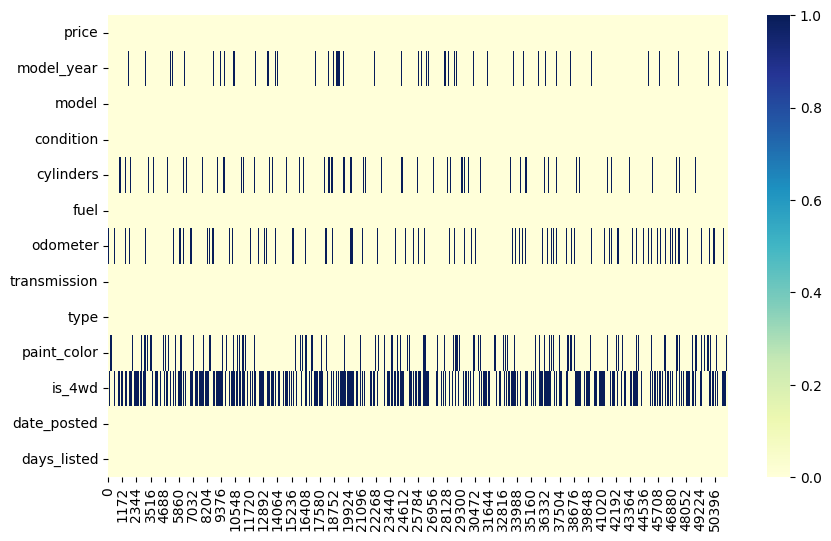

In [15]:
# Visualizing Missing Data using a seaborn heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu")
plt.show()

**Findings:**

1. There are missing values in the 'model_year' column with a percentage of 7%.
2. There are missing values in the 'cylinders' column with a percentage of 10%.
3. There are missing values in the 'odometer' column with a percentage of 15%.
4. There are missing values in the 'paint color' column with a percentage of 17%.
5. There are missing values in the 'is_4wd' column with a percentage of 50%.
6. Rows with different missing values in their columns demonstrate that the missing values do not follow any specific pattern and occur randomly.

### Conclusion: <a id='data_review_conclusions'></a>

1. There are several issues with the data, including:
   - Incorrect data types (columns: date_posted, is_4wd, price, model_year, cylinders, odometer).
   - Outliers (columns price and odometer).
   - Missing values (columns model_year, cylinders, odometer, paint_color, and is_4wd).
   - Data redundancy due to capitalization issues (column model, for example FORD and ford).

2. Next Steps:
   - Convert to appropriate data types.
   - Analyze outliers.
   - Analyze missing values and decide whether to fill them or not (to ensure data representation is not altered).
   - Remove data redundancy by converting to lowercase.

## 2 Data Preprocessing <a id='data_preprocessing'></a>

[Back to Contents](#back)

### 2.1 Working with Missing Values <a id='missing_values'></a>

In [16]:
# Checking data distribution in categorical columns to determine the standard grouping during imputation with median values.
columns_distribution = ['model', 'condition', 'fuel', 'transmission', 'type', 'paint_color', 'date_posted']
for column in columns_distribution:
    print(column)
    print(df[column].value_counts())
    print()

model
model
ford f-150                           2796
chevrolet silverado 1500             2171
ram 1500                             1750
chevrolet silverado                  1271
jeep wrangler                        1119
                                     ... 
ford f-250 super duty                 241
acura tl                              236
kia sorento                           236
nissan murano                         235
mercedes-benz benze sprinter 2500      41
Name: count, Length: 100, dtype: int64

condition
condition
excellent    24773
good         20145
like new      4742
fair          1607
new            143
salvage        115
Name: count, dtype: int64

fuel
fuel
gas         47288
diesel       3714
hybrid        409
other         108
electric        6
Name: count, dtype: int64

transmission
transmission
automatic    46902
manual        2829
other         1794
Name: count, dtype: int64

type
type
SUV            12405
truck          12353
sedan          12154
pickup         

**Findings:**

Based on the above, the "type" column will be used as the standard grouping for median imputation when dealing with missing values because the number of rows among types is not too different.
This is to avoid altering the data distribution, which could impact the final outcome of the dataset after filling the missing values.

#### is_4wd column

1. Despite the high percentage of missing values (>50%), since this column is boolean, we can still fill it without altering its data representation.
2. the value 1 means True. Therefore, for the missing data, it will be filled with the value 0 (false).

In [17]:
# The number of missing values in the data
df['is_4wd'].isna().sum()

25953

In [18]:
# imputting missing values
df['is_4wd'] = df['is_4wd'].fillna(0)

In [19]:
# verify the data
df['is_4wd'].isna().sum()

0

#### model_year column

1. The percentage of missing values is small, only 7%, so data imputation will not alter the original data representation.
2. The imputation of missing values is based on the median of the "type" category.
3. Data visualization before and after imputation will be presented to ensure that filling missing values does not alter the original data representation.

In [20]:
#  function to fill in missing values
def data_imputation(data, column_grouping, column_selected):
    # Parameter meaning
    # data => The name of the dataframe to be processed
    # column_grouping => The column used to group values and take the median
    # column_selected => The column in which we will fill its NaN values

    # Get unique category groups
    group = data[column_grouping].unique()

    # Loop through each value in the group category
    for value in group:
        # get median
        median = data.loc[(data[column_grouping]==value) & ~(data[column_selected].isna()), column_selected].median()

        # change missing value
        data.loc[(data[column_grouping]==value) & (data[column_selected].isna()), column_selected] = median

    # Return the dataframe after filling the missing values
    return data

In [21]:
# the number of missing values in the data
df['model_year'].isna().sum()

3619

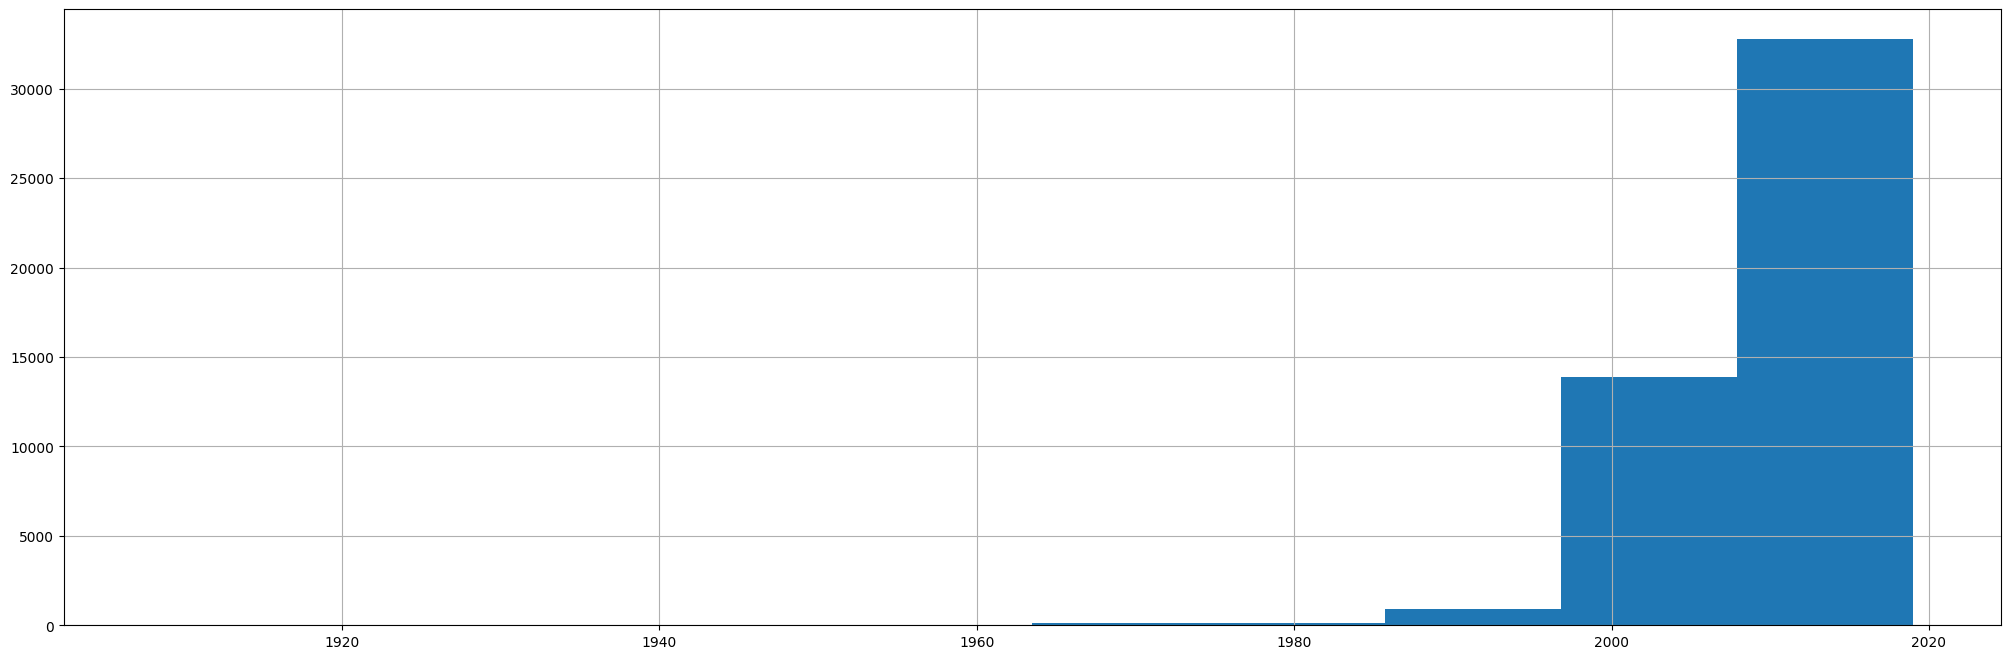

In [22]:
# Checking the histogram before imputing the missing values
df['model_year'].hist(figsize=(25,8))
plt.show()

In [23]:
# apply the function
df = data_imputation(data=df, column_grouping='type', column_selected='model_year')

In [24]:
# verify the data
df['model_year'].isna().sum()

0

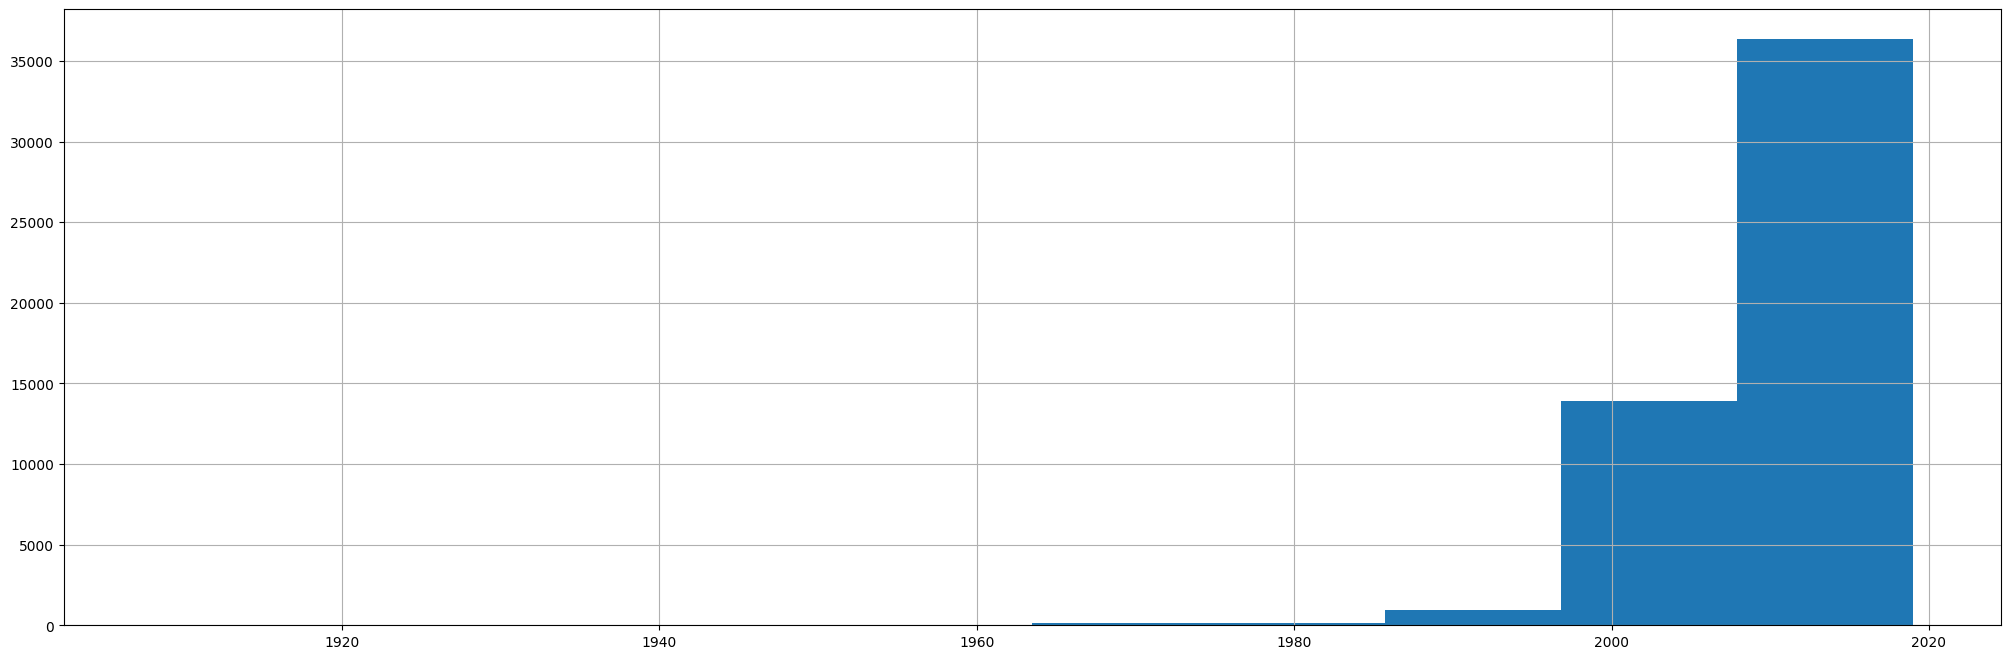

In [25]:
# histogram after imputing the missing values
df['model_year'].hist(figsize=(25,8))
plt.show()

#### cylinders column

1. The percentage of missing values is small, only 10%, so data imputation will not alter the original data representation.
2. The imputation of missing values is based on the median of the "type" category.
3. Data visualization before and after imputation will be presented to ensure that filling missing values does not alter the original data representation.

In [26]:
# the number of missing values in the data
df['cylinders'].isna().sum()

5260

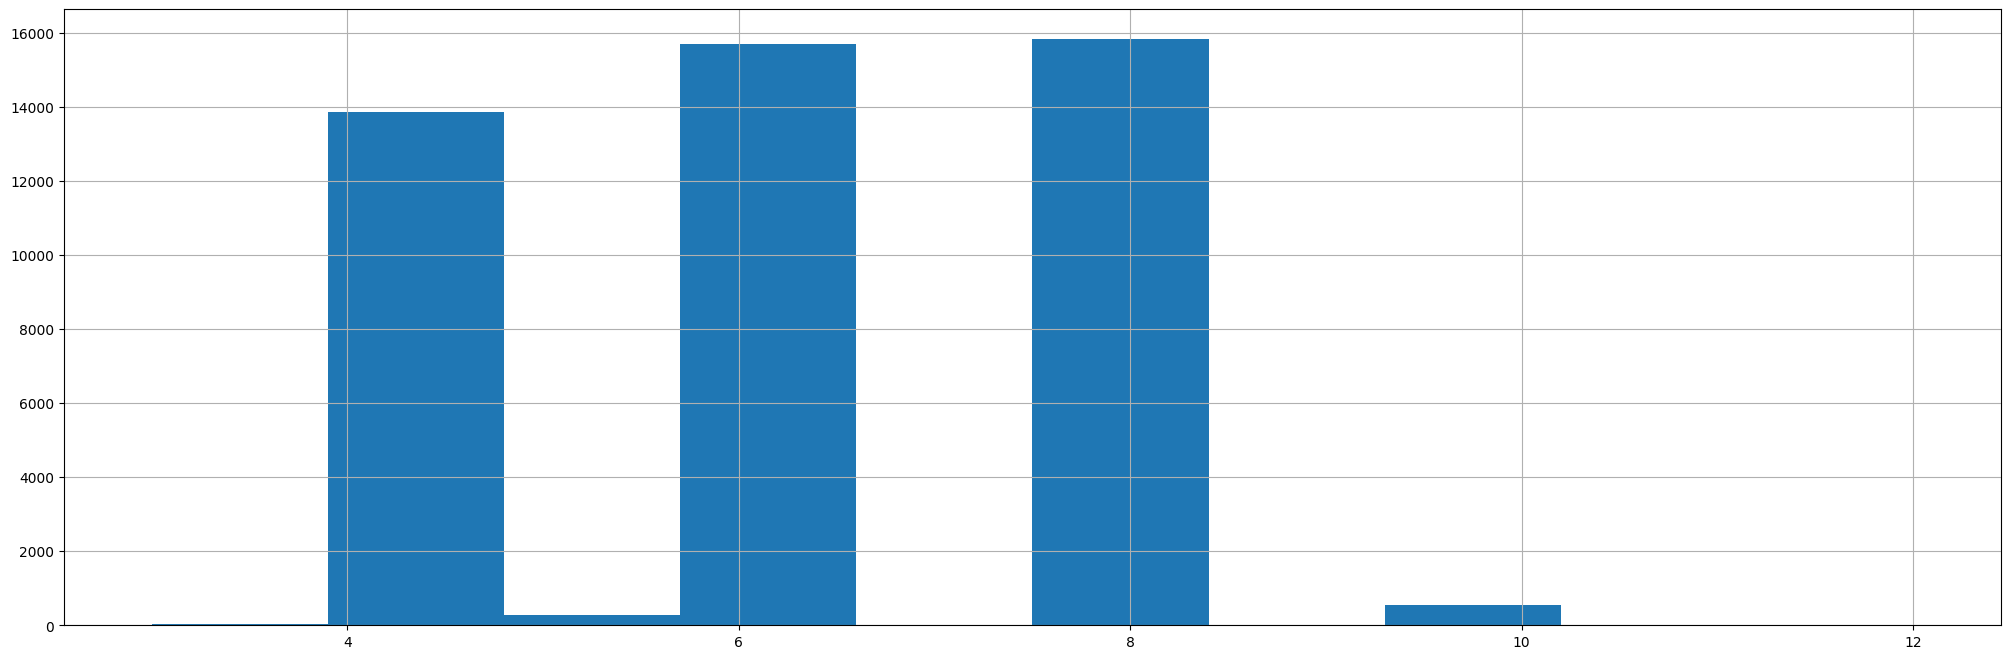

In [27]:
# Checking the histogram before imputing the missing values
df['cylinders'].hist(figsize=(25,8))
plt.show()

In [28]:
# apply the function
df = data_imputation(data=df, column_grouping='type', column_selected='cylinders')

In [29]:
# verify the data
df['cylinders'].isna().sum()

0

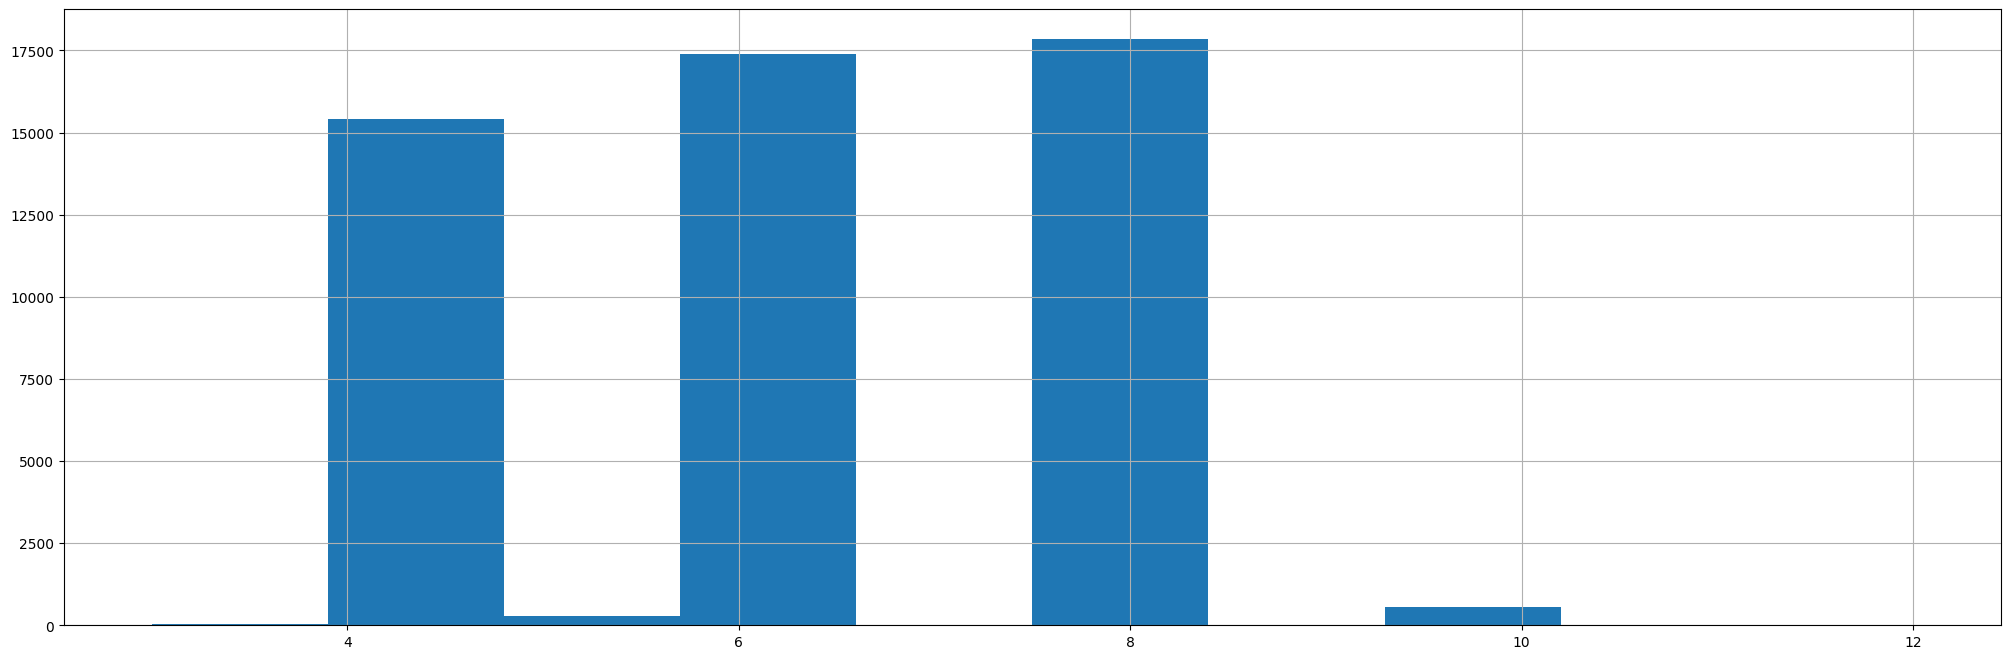

In [30]:
# histogram after imputing the missing values
df['cylinders'].hist(figsize=(25,8))
plt.show()

#### odometer column

1. The percentage of missing values is small, only 15%, so data imputation will not alter the original data representation.
2. The imputation of missing values is based on the median of the "type" category.
3. Data visualization before and after imputation will be presented to ensure that filling missing values does not alter the original data representation.

In [31]:
# the number of missing values in the data
df['odometer'].isna().sum()

7892

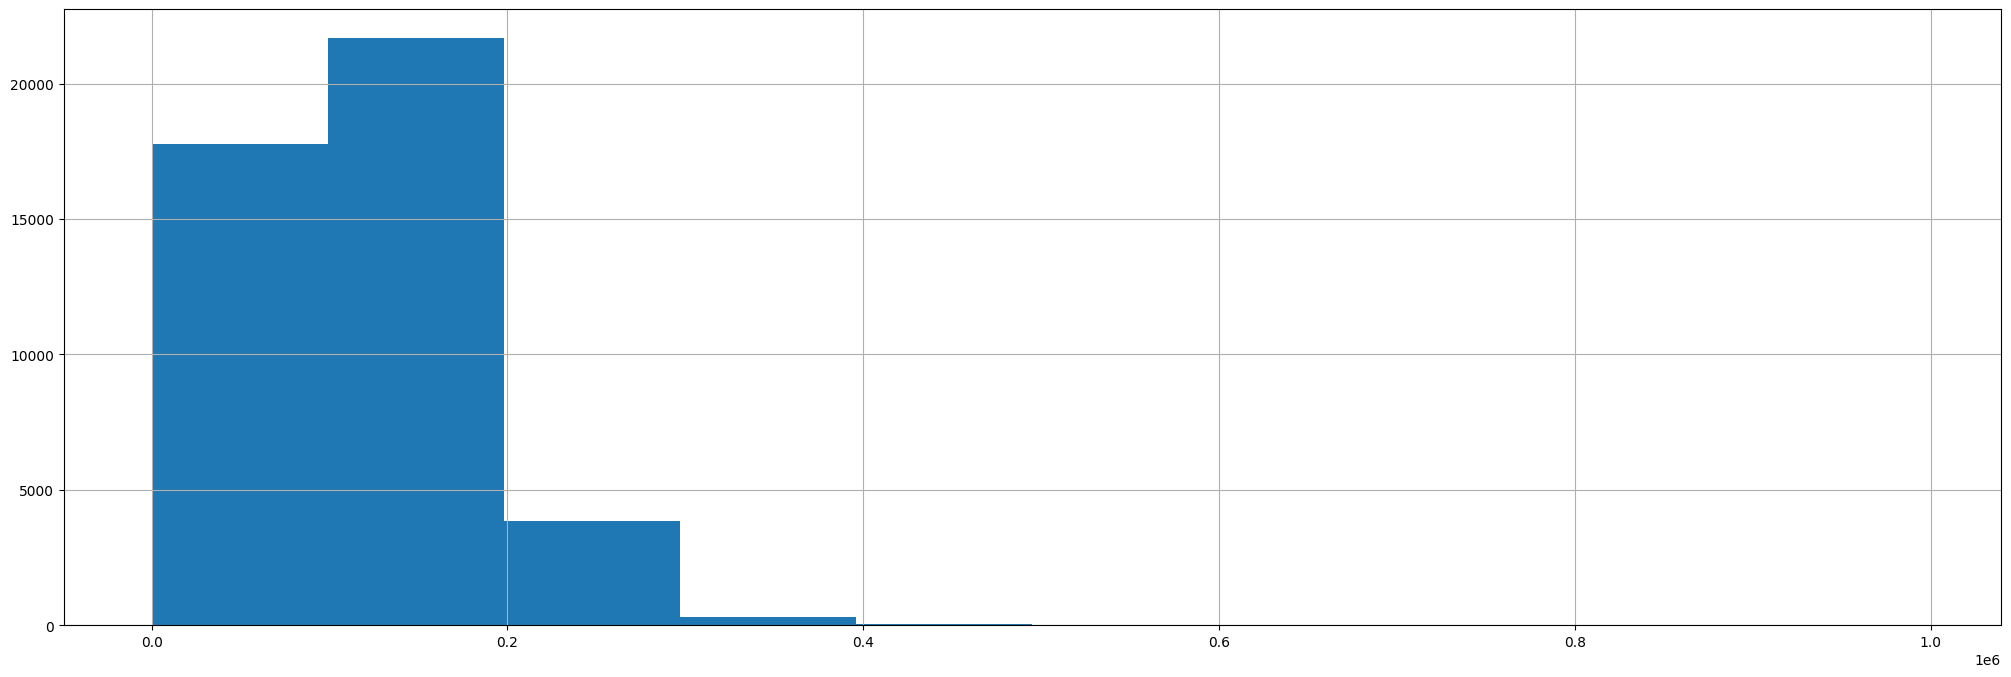

In [32]:
# Checking the histogram before imputing the missing values
df['odometer'].hist(figsize=(25,8))
plt.show()

In [33]:
# apply the function
df = data_imputation(data=df, column_grouping='type', column_selected='odometer')

In [34]:
# verify the data
df['odometer'].isna().sum()

0

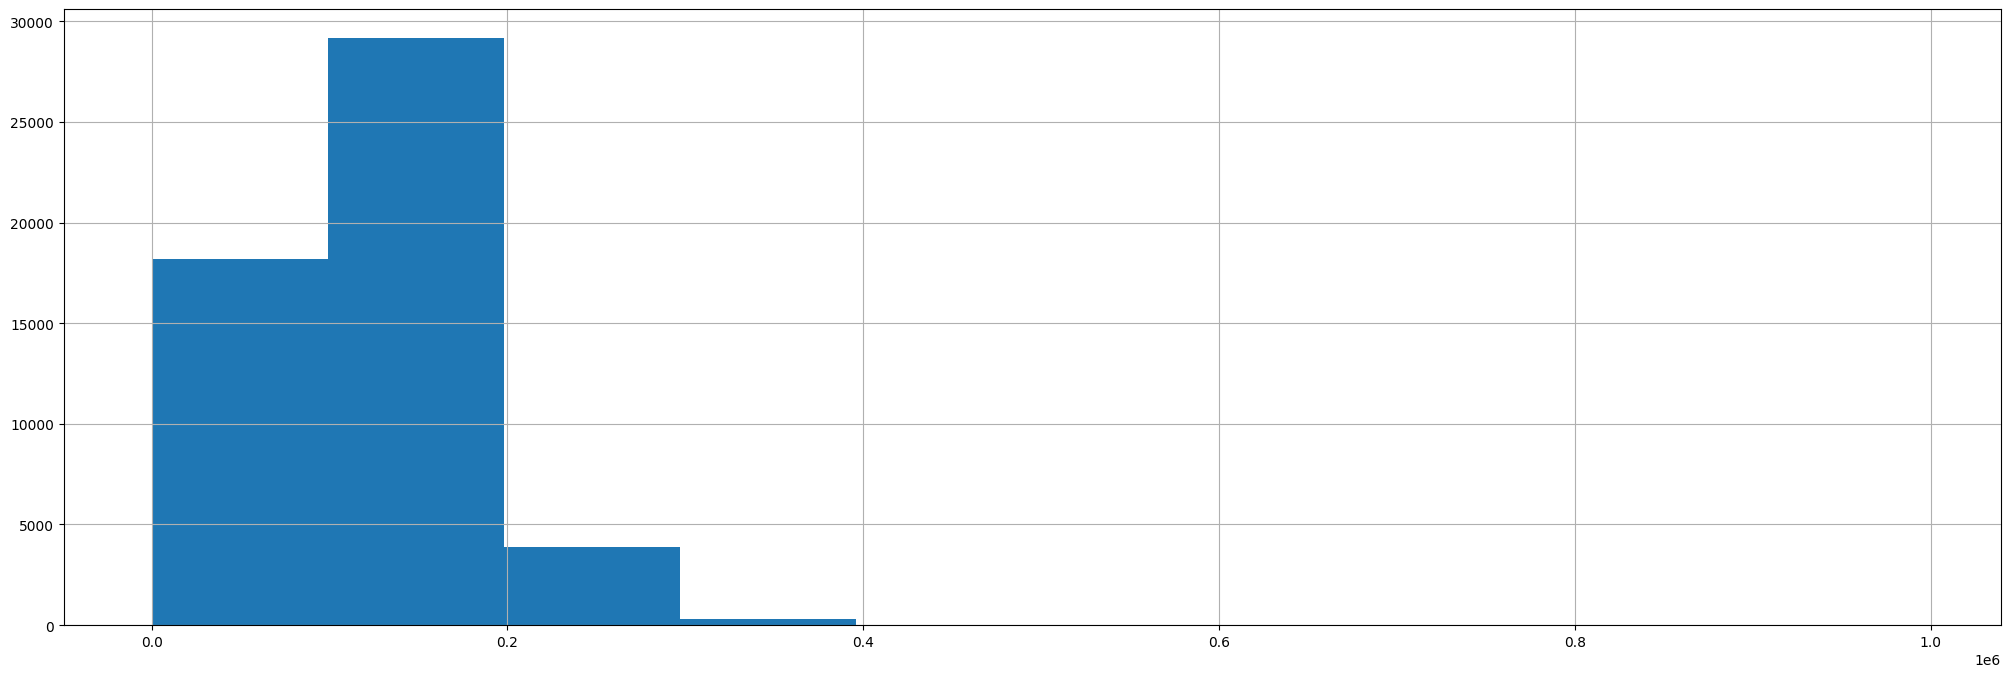

In [35]:
# histogram after imputing the missing values
df['odometer'].hist(figsize=(25,8))
plt.show()

#### paint_color column

1. The percentage of missing values is small, only 17%.
2. Since this is categorical data, we will replace the missing values with 'unknown'.

In [36]:
# the number of missing values in the data
df['paint_color'].isna().sum()

9267

In [37]:
# imputting missing values
df['paint_color'] = df['paint_color'].fillna('unknown')

In [38]:
# verify the data
df['paint_color'].isna().sum()

0

In [39]:
# verify all columns after imputting missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


### 2.2 Fixing Data Types <a id='data_types'></a>

#### date_posted column

fix the type to datetime

In [40]:
df['date_posted'] = pd.to_datetime(df['date_posted'])

#### is_4wd column

fix the type to boolean

In [41]:
df['is_4wd'] = df['is_4wd'].astype(bool)

#### price and odometer columns

fix the type to float

In [42]:
df['price'] = df['price'].astype('float64')
df['odometer'] = df['odometer'].astype('float64')

#### model_year and cylinders columns

fix the type to integer

In [43]:
df['model_year'] = df['model_year'].astype('int64')
df['cylinders'] = df['cylinders'].astype('int64')

In [44]:
# verify the type for all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  float64       
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.8+ MB


### 2.3 Adding new column for analysing data <a id='new_column'></a>

**New column to be added into dataset**

1. date_last_posted: The date when the advertisement was last displayed. It is calculated as date_posted + days_listed.
2. car_age: The age of the car when the advertisement is completed. It is calculated as date_last_posted - model_year.
3. yearly_odometer: The average yearly odometer reading of the vehicle. It is calculated as odometer / car_age.
4. value_condition: A representation of the values in the condition column.
5. car_brand: brand of the car

#### date_last_posted

In [45]:
from datetime import timedelta
df['date_last_posted'] = df['date_posted'] + pd.to_timedelta(df['days_listed'], unit = 'D')
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date_last_posted
0,9400.0,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,2018-07-12
1,25500.0,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,2018-12-08
2,5500.0,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,2019-04-27
3,1500.0,2003,ford f-150,fair,8,gas,118622.0,automatic,pickup,unknown,False,2019-03-22,9,2019-03-31
4,14900.0,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2019-04-30


#### car_age

In [46]:
df['car_age'] = df['date_last_posted'].dt.year - df['model_year']
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date_last_posted,car_age
0,9400.0,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,2018-07-12,7
1,25500.0,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,2018-12-08,7
2,5500.0,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,2019-04-27,6
3,1500.0,2003,ford f-150,fair,8,gas,118622.0,automatic,pickup,unknown,False,2019-03-22,9,2019-03-31,16
4,14900.0,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2019-04-30,2


#### yearly_odometer

In [47]:
df['yearly_odometer'] = df['odometer'] / df['car_age'] + 1
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date_last_posted,car_age,yearly_odometer
0,9400.0,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,2018-07-12,7,20715.285714
1,25500.0,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,2018-12-08,7,12673.142857
2,5500.0,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,2019-04-27,6,18334.333333
3,1500.0,2003,ford f-150,fair,8,gas,118622.0,automatic,pickup,unknown,False,2019-03-22,9,2019-03-31,16,7414.875000
4,14900.0,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2019-04-30,2,40452.500000


In [48]:
# changing positive infite to NaN. After that, changin NaN values to 1 (integer data type)

df['yearly_odometer'] = pd.to_numeric(df['yearly_odometer'], errors='coerce')
df['yearly_odometer'] = df['yearly_odometer'].replace(np.inf, int(float(0)))
df['yearly_odometer'] = df['yearly_odometer'].fillna(1).astype(int)
df['yearly_odometer'] = df['yearly_odometer'].astype('int64') 

#### value_condition

In [49]:
x = {'new':5, 'like new':4, 'excellent':3,'good':2, 'fair':1, 'salvage':0}

df['value_condition'] = df['condition'].map(x)
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date_last_posted,car_age,yearly_odometer,value_condition
0,9400.0,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,2018-07-12,7,20715,2
1,25500.0,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,2018-12-08,7,12673,2
2,5500.0,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,2019-04-27,6,18334,4
3,1500.0,2003,ford f-150,fair,8,gas,118622.0,automatic,pickup,unknown,False,2019-03-22,9,2019-03-31,16,7414,1
4,14900.0,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2019-04-30,2,40452,3
5,14990.0,2014,chrysler 300,excellent,6,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,2018-07-05,4,14489,3
6,12990.0,2015,toyota camry,excellent,4,gas,79212.0,automatic,sedan,white,False,2018-12-27,73,2019-03-10,4,19804,3
7,15990.0,2013,honda pilot,excellent,6,gas,109473.0,automatic,SUV,black,True,2019-01-07,68,2019-03-16,6,18246,3
8,11500.0,2012,kia sorento,excellent,4,gas,104174.0,automatic,SUV,unknown,True,2018-07-16,19,2018-08-04,6,17363,3
9,9200.0,2008,honda pilot,excellent,6,gas,147191.0,automatic,SUV,blue,True,2019-02-15,17,2019-03-04,11,13382,3


#### adding days, week, month and year columns of date_posted

In [52]:
df['days'] = df['date_posted'].dt.dayofweek 
df['week'] = df['date_posted'].dt.strftime("%m")
df['month'] = df['date_posted'].dt.month 
df['year'] = df['date_posted'].dt.year 
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,...,date_posted,days_listed,date_last_posted,car_age,yearly_odometer,value_condition,days,week,month,year
0,9400.0,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,...,2018-06-23,19,2018-07-12,7,20715,2,5,06,6,2018
1,25500.0,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,...,2018-10-19,50,2018-12-08,7,12673,2,4,10,10,2018
2,5500.0,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,...,2019-02-07,79,2019-04-27,6,18334,4,3,02,2,2019
3,1500.0,2003,ford f-150,fair,8,gas,118622.0,automatic,pickup,unknown,...,2019-03-22,9,2019-03-31,16,7414,1,4,03,3,2019
4,14900.0,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,...,2019-04-02,28,2019-04-30,2,40452,3,1,04,4,2019
5,14990.0,2014,chrysler 300,excellent,6,gas,57954.0,automatic,sedan,black,...,2018-06-20,15,2018-07-05,4,14489,3,2,06,6,2018
6,12990.0,2015,toyota camry,excellent,4,gas,79212.0,automatic,sedan,white,...,2018-12-27,73,2019-03-10,4,19804,3,3,12,12,2018
7,15990.0,2013,honda pilot,excellent,6,gas,109473.0,automatic,SUV,black,...,2019-01-07,68,2019-03-16,6,18246,3,0,01,1,2019
8,11500.0,2012,kia sorento,excellent,4,gas,104174.0,automatic,SUV,unknown,...,2018-07-16,19,2018-08-04,6,17363,3,0,07,7,2018
9,9200.0,2008,honda pilot,excellent,6,gas,147191.0,automatic,SUV,blue,...,2019-02-15,17,2019-03-04,11,13382,3,4,02,2,2019


#### car_brand

In [53]:
# function to categorize car's model based on the brand
def car_brand(brand):
    if 'bmw' in brand:
        return 'BMW'
    elif 'ford' in brand:
        return 'Ford'
    elif 'chrysler' in brand:
        return 'Chrysler'
    elif 'toyota' in brand:
        return 'Toyota'
    elif 'honda' in brand:
        return 'Honda'
    elif 'kia' in brand:
        return 'Kia'
    elif 'chevrolet' in brand:
        return 'Chevrolet'
    elif 'ram' in brand:
        return 'Ram'
    elif 'gmc' in brand:
        return 'GMC'
    elif 'jeep' in brand:
        return 'Jeep'
    elif 'hyundai' in brand:
        return 'Hyundai'
    elif 'nissan' in brand:
        return 'Nissan'
    elif 'subaru' in brand:
        return 'Subaru'
    elif 'dodge' in brand:
        return 'Dodge'
    elif 'mercedes' in brand:
        return 'Mercedes-Benz'
    elif 'acura' in brand:
        return 'Acura'
    elif 'cadillac' in brand:
        return 'Cadillac'
    elif 'volkswagen' in brand:
        return 'VW'
    elif 'buick' in brand:
        return 'Buick'
    return 'undefined'

In [54]:
# apply the function in a new column
df['car_brand'] = df['model'].apply(car_brand)
df['car_brand'].value_counts()

car_brand
Ford             12672
Chevrolet        10611
Toyota            5445
Honda             3485
Ram               3316
Jeep              3281
Nissan            3208
GMC               2378
Subaru            1272
Dodge             1255
Hyundai           1173
VW                 869
Chrysler           838
Kia                585
Cadillac           322
Buick              271
BMW                267
Acura              236
Mercedes-Benz       41
Name: count, dtype: int64

#### check the data

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             51525 non-null  float64       
 1   model_year        51525 non-null  int64         
 2   model             51525 non-null  object        
 3   condition         51525 non-null  object        
 4   cylinders         51525 non-null  int64         
 5   fuel              51525 non-null  object        
 6   odometer          51525 non-null  float64       
 7   transmission      51525 non-null  object        
 8   type              51525 non-null  object        
 9   paint_color       51525 non-null  object        
 10  is_4wd            51525 non-null  bool          
 11  date_posted       51525 non-null  datetime64[ns]
 12  days_listed       51525 non-null  int64         
 13  date_last_posted  51525 non-null  datetime64[ns]
 14  car_age           5152

In [56]:
df.describe()

,price,model_year,cylinders,odometer,date_posted,days_listed,date_last_posted,car_age,yearly_odometer,value_condition,days,month,year
count,51525.000000,51525.000000,51525.000000,51525.000000,51525,51525.00000,51525,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000
mean,12132.464920,2009.832741,6.130810,115178.086075,2018-10-25 01:57:46.270742528,39.55476,2018-12-03 15:16:37.519650560,8.585541,17357.600427,2.637535,3.005434,6.628491,2018.307462
min,1.000000,1908.000000,3.000000,0.000000,2018-05-01 00:00:00,0.00000,2018-05-04 00:00:00,0.000000,0.000000,0.000000,0.000000,1.000000,2018.000000
25%,5000.000000,2007.000000,4.000000,77294.000000,2018-07-29 00:00:00,19.00000,2018-09-06 00:00:00,4.000000,9755.000000,2.000000,1.000000,3.000000,2018.000000
50%,9000.000000,2011.000000,6.000000,118622.000000,2018-10-25 00:00:00,33.00000,2018-12-03 00:00:00,8.000000,14508.000000,3.000000,3.000000,7.000000,2018.000000
75%,16839.000000,2014.000000,8.000000,146541.000000,2019-01-21 00:00:00,53.00000,2019-03-02 00:00:00,12.000000,20751.000000,3.000000,5.000000,10.000000,2019.000000
max,375000.000000,2019.000000,12.000000,990000.000000,2019-04-19 00:00:00,271.00000,2019-11-23 00:00:00,110.000000,279366.000000,5.000000,6.000000,12.000000,2019.000000
std,10040.803015,6.070703,1.658414,60121.248530,NaN,28.20427,NaN,6.086610,14656.288837,0.712447,1.997759,3.474134,0.461447


In [57]:
df.sample(frac = 0.20)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,...,days_listed,date_last_posted,car_age,yearly_odometer,value_condition,days,week,month,year,car_brand
13592,800.0,2000,chevrolet impala,salvage,4,gas,150000.0,automatic,sedan,red,...,16,2018-10-03,18,8334,0,0,09,9,2018,Chevrolet
6683,2000.0,2008,ford focus se,fair,6,gas,137000.0,manual,coupe,silver,...,72,2018-07-19,10,13701,1,1,05,5,2018,Ford
35238,14500.0,2006,ford f150,like new,8,gas,67000.0,automatic,truck,white,...,43,2019-03-28,13,5154,4,2,02,2,2019,Ford
26662,5300.0,2008,honda civic lx,good,4,gas,101728.0,automatic,coupe,silver,...,74,2019-05-23,11,9249,2,6,03,3,2019,Honda
1343,14995.0,2015,honda accord,like new,4,gas,61746.0,automatic,sedan,white,...,70,2019-05-09,4,15437,4,3,02,2,2019,Honda
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23541,4200.0,2006,toyota corolla,good,4,gas,81500.0,manual,sedan,unknown,...,17,2018-11-01,12,6792,2,0,10,10,2018,Toyota
6877,4200.0,2006,ford fusion,like new,4,gas,70000.0,automatic,sedan,unknown,...,43,2018-08-21,12,5834,4,0,07,7,2018,Ford
20049,41500.0,2017,ford f250 super duty,excellent,8,diesel,43376.0,automatic,truck,white,...,43,2019-03-23,2,21689,3,4,02,2,2019,Ford
31351,6999.0,2013,volkswagen passat,excellent,6,gas,115.0,automatic,sedan,grey,...,33,2019-04-12,6,20,3,6,03,3,2019,VW


### 2.4 Correlation Matrix of Core Variable <a id='corr_matrix'></a>

The following are the core variables:
1. price
2. model_year
3. cylinders
4. car_age
5. days_listed
6. yearly_odometer

#### scatter matrix

In [58]:
# Displaying the correlation of core parameters
df[['price','model_year', 'value_condition', 'cylinders', 'car_age','days_listed', 'yearly_odometer']].corr()

,price,model_year,value_condition,cylinders,car_age,days_listed,yearly_odometer
price,1.000000,0.412303,0.221518,0.303726,-0.411038,-0.000682,0.154923
model_year,0.412303,1.000000,0.271325,-0.139027,-0.996711,-0.005457,0.388402
value_condition,0.221518,0.271325,1.000000,-0.063390,-0.270483,-0.002404,0.061169
cylinders,0.303726,-0.139027,-0.063390,1.000000,0.138237,0.002932,-0.035308
car_age,-0.411038,-0.996711,-0.270483,0.138237,1.000000,0.019243,-0.393838
days_listed,-0.000682,-0.005457,-0.002404,0.002932,0.019243,1.000000,-0.014251
yearly_odometer,0.154923,0.388402,0.061169,-0.035308,-0.393838,-0.014251,1.000000


**Result Analysis**

1. Core variables that influence each other are:
   
    a. Price and Model Year. The more recent the car's model year, the higher its price. (correlation value 0.41)
    b. Price and Car Age. The higher the price, the more recent the car's age. (correlation value -0.41)
    c. Model Year and Yearly Odometer. The higher or older the model year, the higher its yearly odometer reading. (correlation value 0.39)
    d. Price and Odometer. The higher the price, the lower the odometer reading. (correlation value 0.15)
    e. Value_condition and Price. The better the condition, the tendency to have a higher price. (correlation value 0.22)
    f. Value_condition and Model Year. The better the condition, the newer the car's model year. (correlation value 0.27)

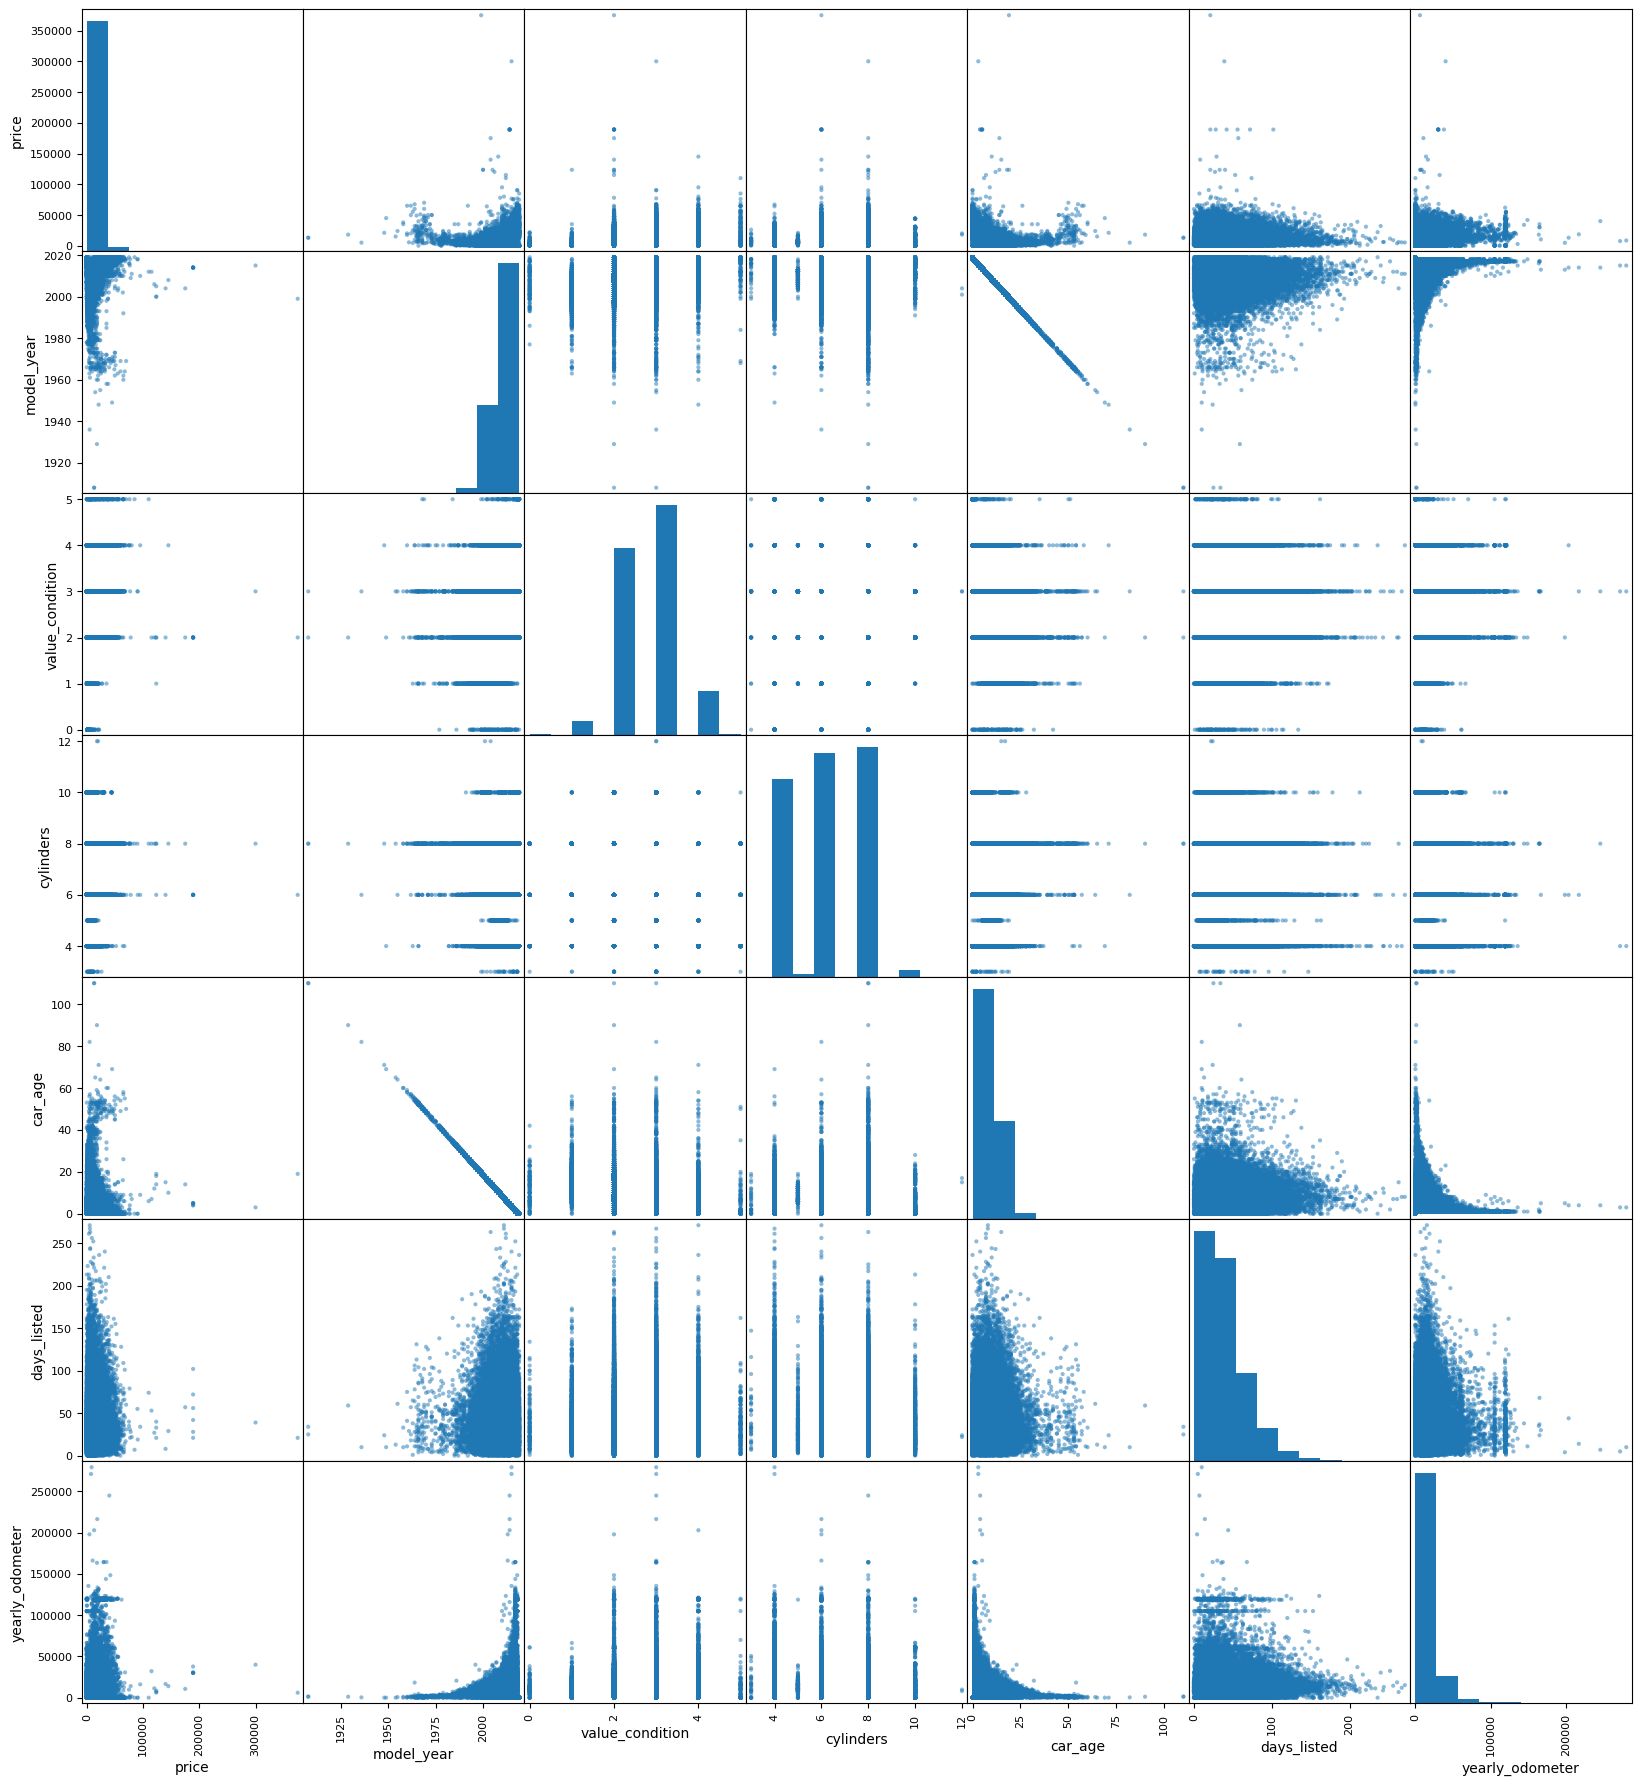

In [59]:
# Visualize using scatter matrix
core_parameters = df[['price','model_year', 'value_condition', 'cylinders', 'car_age','days_listed', 'yearly_odometer']]
pd.plotting.scatter_matrix(core_parameters, figsize=(20, 22)) 
plt.show()

**Findings:**

1. The first upper-left cell displays the relationship between "price" and "price." The histogram diagram indicates that the highest statistical distribution of price is above 350,000.

2. The second upper-left cell displays the relationship between "price" and "model_year." The scatter plot diagram shows that the data is centered around the years 2000 to 2020, with a price range between 0 and 50,000.

3. The third upper-left cell displays the relationship between "price" and "value_condition." The scatter plot diagram shows that the data is centered around value conditions 2, 3, 4, and 5, with a price range between 0 and 100,000.

4. The fourth upper-left cell displays the relationship between "price" and "cylinders." The scatter plot diagram shows that the most common data is found for cylinders 6 and 8, with a price range between 0 and 100,000.

5. The fifth upper-left cell displays the relationship between "price" and "car_age." The scatter plot diagram shows that the most common data is found for car ages between 0 and 40, with a price range between 0 and 50,000.

6. The sixth upper-left cell displays the relationship between "price" and "days_listed." The scatter plot diagram shows that the most common data is found for days listed between 0 and 149, with a price range between 0 and 100,000.

7. The seventh upper-left cell displays the relationship between "price" and "yearly odometer." The scatter plot diagram shows that the most common data is found for yearly odometer values between 0 and 50,000, with an average price between 0 and 50,000.

#### histogram

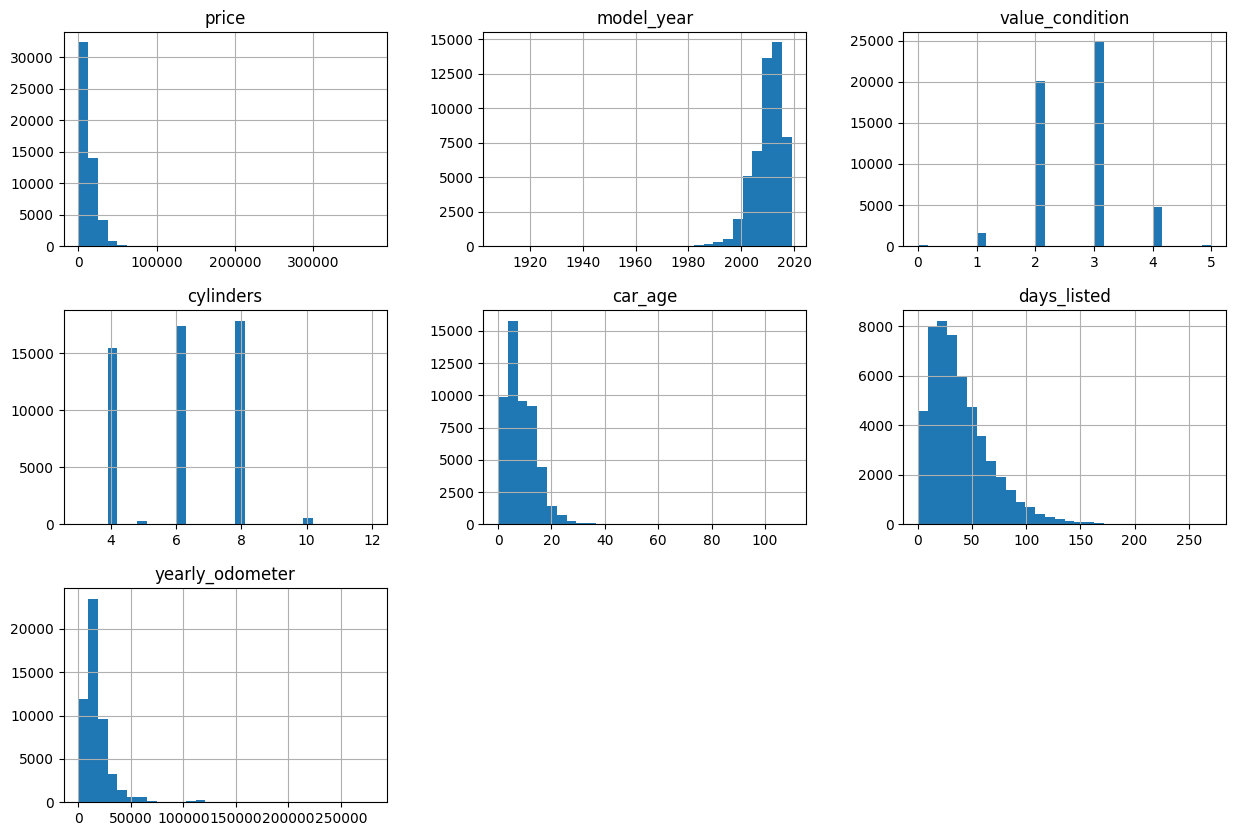

In [60]:
# histogram of core parameters

core_parameters.hist(bins=30, figsize=(15, 10))
plt.show()

### 2.5 Checking Outliers using Histogram and Boxplot <a id='check_outliers'></a>

#### price variable

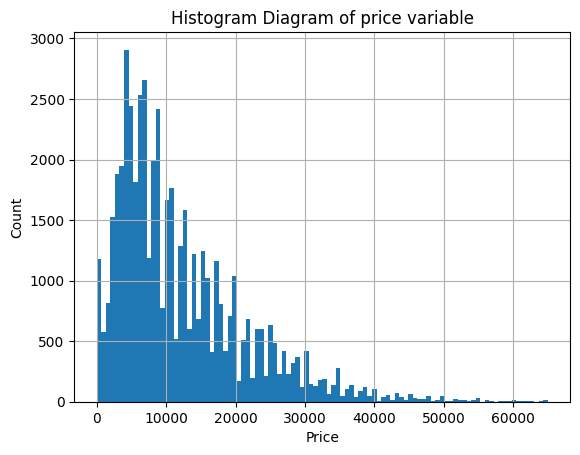

In [61]:
# histogram of price column
df['price'].hist(bins=100, range=[0, 65000])

# adding title, xlabel and ylabel
plt.xlabel('Price')
plt.ylabel('Count')
plt.title("Histogram Diagram of price variable");

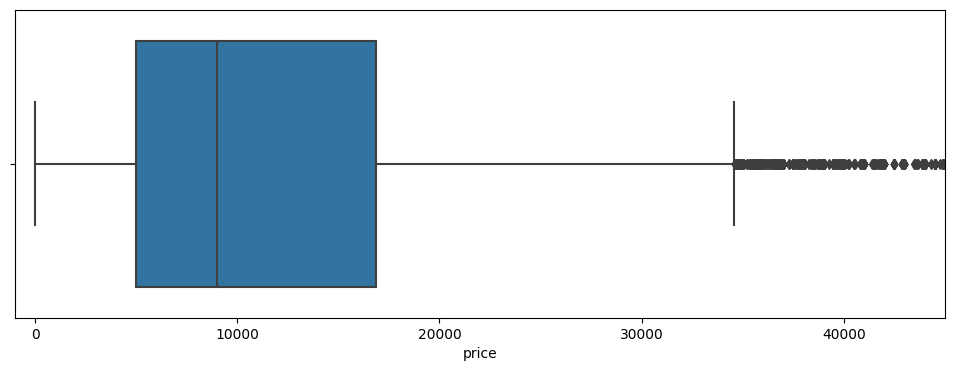

In [62]:
# boxplot of price column
plt.figure(figsize=(12,4))
sns.boxplot(x="price", data=df)
plt.xlim(-1000, 45000)
plt.show()

**Findings**

1. The median is around 9,000, meaning 50% of the price values are below 9,000 and 50% are above 9,000.
2. Q1 is around 5,000, meaning 25% of the price values fall around 5,000.
3. Q3 is around 17,000, meaning 25% of the price values fall around 17,000. Considering a total of 51,525 data points, 25% corresponds to 12,881.25.
4. The boxplot indicates that the "price" column has outliers.

#### car_age variable

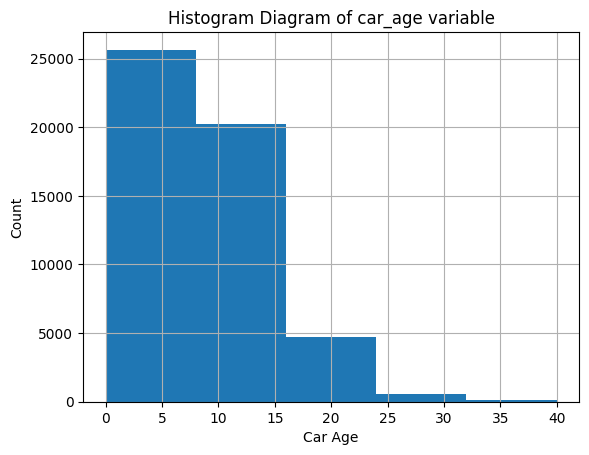

In [63]:
# histogram of car_age
df['car_age'].hist(bins=5, range=[0, 40])

# adding title, xlabel and ylabel
plt.xlabel('Car Age')
plt.ylabel('Count')
plt.title("Histogram Diagram of car_age variable");

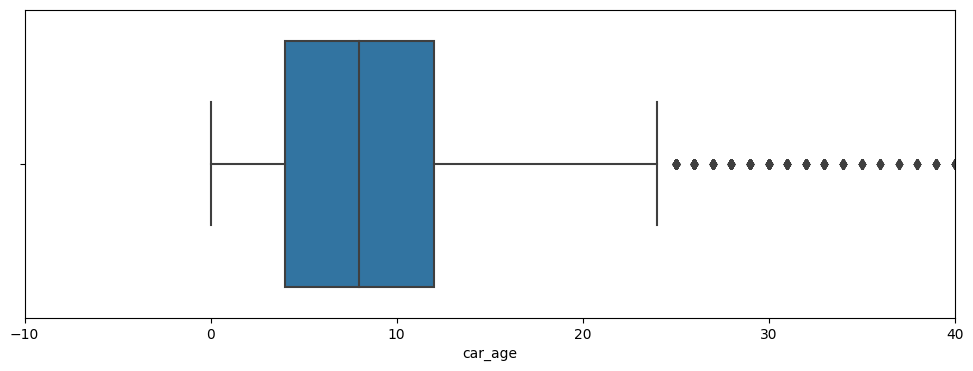

In [64]:
# boxplot of car age
plt.figure(figsize=(12,4))
sns.boxplot(x="car_age", data=df)
plt.xlim(-10,40)
plt.show()

**Findings**

1. The median is around 8, meaning 50% of the car_age values are below 8, and 50% are above 8.
2. Q1 is around 4, meaning 25% of the car_age values fall around 4.
3. Q3 is around 12, meaning 25% of the car_age values fall around 12.
4. The boxplot indicates that the "car_age" column has outliers.

#### yearly_odometer variable

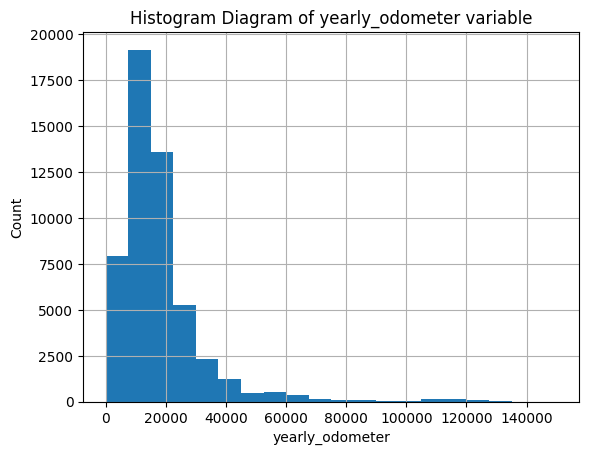

In [65]:
# histogram of yearly_odometer
df['yearly_odometer'].hist(bins=20, range=[0, 150000])

# adding title, xlabel and ylabel
plt.xlabel('yearly_odometer')
plt.ylabel('Count')
plt.title("Histogram Diagram of yearly_odometer variable");

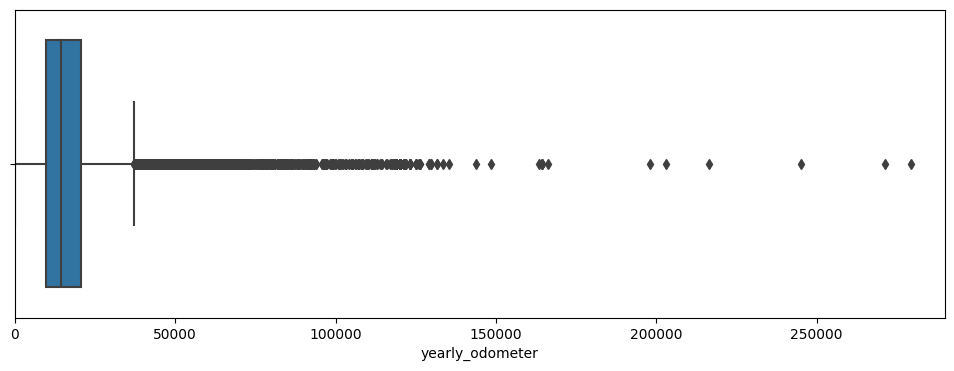

In [66]:
# Visualisasi boxplot pada kolom yearly_odometer
plt.figure(figsize=(12,4))
sns.boxplot(x="yearly_odometer", data=df)
plt.xlim(0, 290000)
plt.show()

**Findings**

1. The median is around 110,000, meaning 50% of the yearly_odometer values are below 110,000, and 50% are above 110,000.
2. Q1 is 77,000, meaning 25% of the odometer values fall around 77,000.
3. Q3 is around 140,000, meaning 25% of the odometer values fall around 140,000.
4. The boxplot indicates that the "odometer" column has outliers.

#### cylinder variable

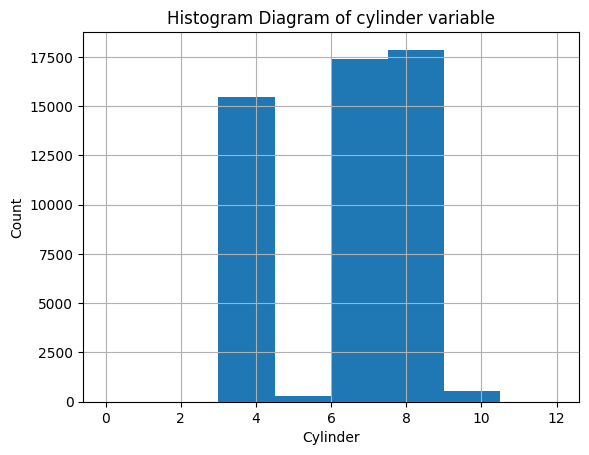

In [67]:
# histogram of cylinder
df['cylinders'].hist(bins=8, range=[0, 12])

# adding title, xlabel and ylabel
plt.xlabel('Cylinder')
plt.ylabel('Count')
plt.title("Histogram Diagram of cylinder variable");

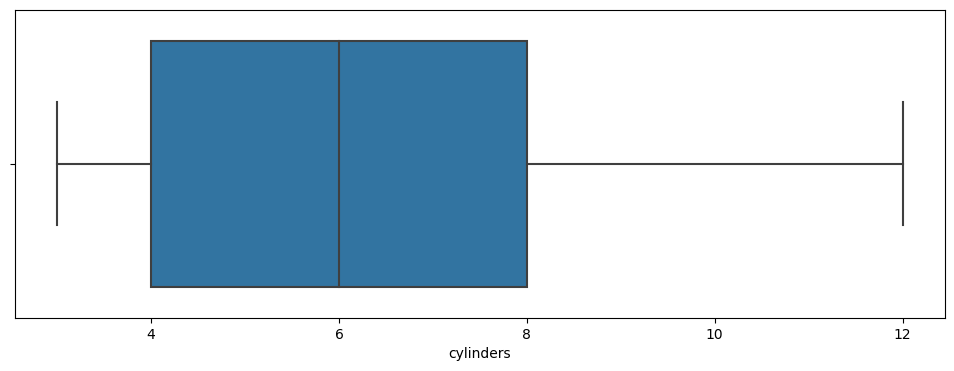

In [68]:
# boxplot of cylinder
plt.figure(figsize=(12,4))
sns.boxplot(x="cylinders", data=df)
plt.show()

**Findings**

1. The median is 6, meaning 50% of the cylinder values are below 6, and 50% are above 6.
2. Q1 is 4, meaning 25% of the cylinder values fall around 4.
3. Q3 is 8, meaning 25% of the cylinder values fall around 8.
4. The boxplot indicates that the "cylinders" column does not have any outliers.

#### days_listed variable

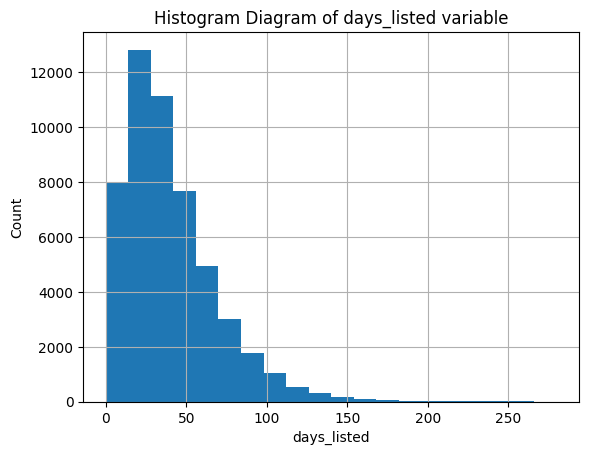

In [69]:
# histogram of days_listed
df['days_listed'].hist(bins=20, range=[0, 280])

# adding title, xlabel and ylabel
plt.xlabel('days_listed')
plt.ylabel('Count')
plt.title("Histogram Diagram of days_listed variable");

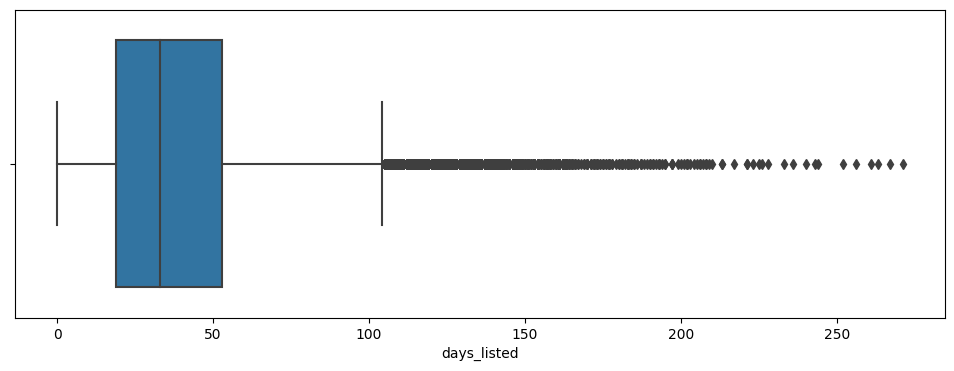

In [70]:
# boxplot of days_listed
plt.figure(figsize=(12,4))
sns.boxplot(x="days_listed", data=df)
plt.show()

In [71]:
df['days_listed'].median()

33.0

**Findings**

1. The median is 33, meaning 50% of the days_listed values are below 33, and 50% are above 33. 
2. Q1 is around 20, meaning 25% of the cylinder values fall around 20.
3. Q3 is around 50, meaning 25% of the cylinder values fall around 50.
4. The boxplot indicates that the "days_listed" variable has outliers.

#### condition

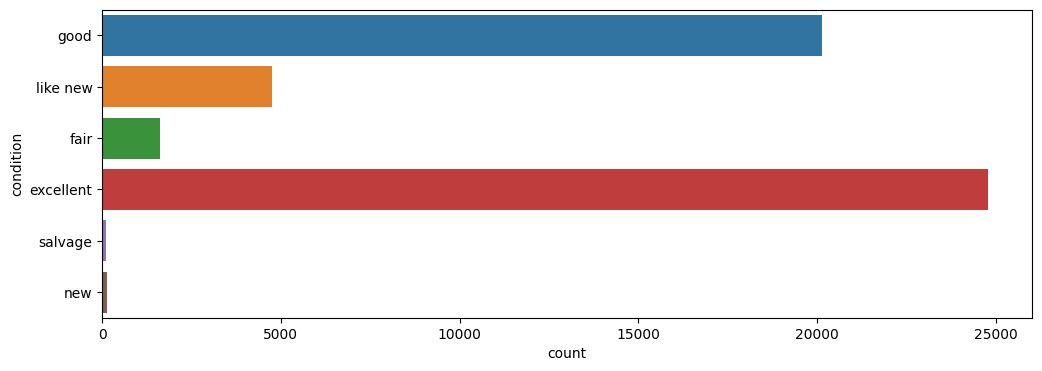

In [72]:
# countplot of condition
plt.figure(figsize=(12,4))
sns.countplot(y="condition", data=df)
plt.show()

In [73]:
# compare price for each condition
price_per_condition = pd.pivot_table(data=df, index = 'condition', values='price', aggfunc='median').sort_values(by='price', ascending=False)
price_per_condition

,price
condition,
new,21999.0
like new,13995.0
excellent,10495.0
good,7900.0
fair,2500.0
salvage,2500.0


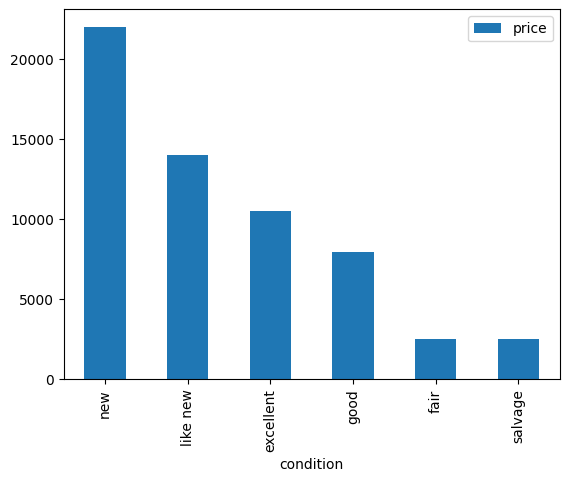

In [74]:
# bar diagram of price_per_condition
price_per_condition.plot(kind = 'bar')
plt.show()

#### Columns with Outliers
From the above boxplot analysis, the columns identified to have outliers are:

1. price
2. car_age
3. yearly_odometer

### 2.6 Define lower bound and upper bound for column with outliers <a id='lower_upper_bound'></a>

In [75]:
# function to determine lower bound using whisker method
def lower_bound(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    
    return Q1 - (1.5*IQR)

In [76]:
# function to determine upper bound using whisker method
def upper_bound(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    
    return Q3 + (1.5*IQR)

#### Price Variable

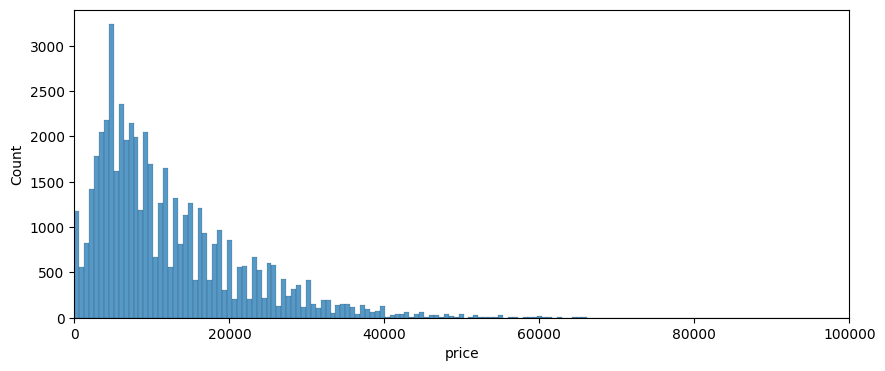

In [78]:
# gaussion distribution of price variable
plt.figure (figsize=(10,4))
sns.histplot(df['price'])
plt.xlim(0, 100000)
plt.show()

**Findings**

From the above diagram, it is known that the distribution of the "price" column is not normal and has outliers on the right side.

In [79]:
# lower bound of price variable
price_lower_bound = lower_bound(df, 'price')
price_lower_bound

-12758.5

In [80]:
# upper bound of price variable
price_upper_bound = upper_bound(df, 'price')
price_upper_bound

34597.5

In [111]:
# the number of outlier data in price variable
outliers_price = df['price'][(df['price'] <= price_lower_bound) | (df['price'] >= price_upper_bound)]
print(outliers_price)
print()
print('The number of outlier data:', len(outliers_price))
print('percentage:', len(outliers_price)/len(df)*100)

42       34900.0
99       39950.0
124      37000.0
142      39990.0
188      52000.0
          ...   
51291    47995.0
51310    34995.0
51342    40990.0
51463    35500.0
51467    38995.0
Name: price, Length: 1646, dtype: float64

The number of outlier data: 1646
percentage: 3.194565744784086


**Findings**

 Outlier data in price variable is 1646 rows, which is 3% of the total rows.

#### car age variable

(0.0, 50.0)

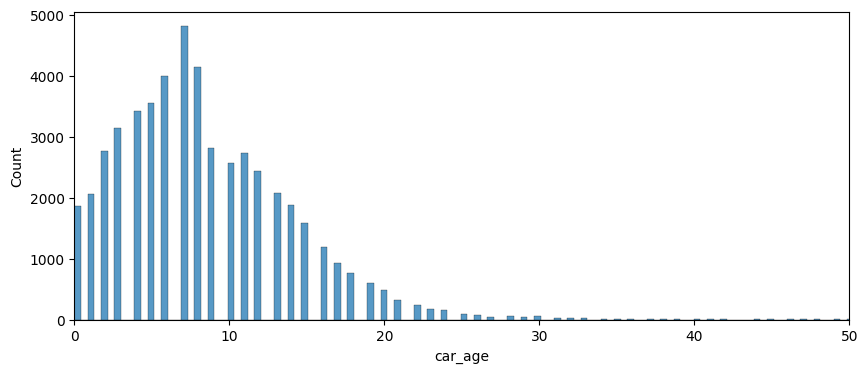

In [110]:
# gaussian distribution of car age
plt.figure(figsize=(10,4))
sns.histplot(df['car_age'])
plt.xlim(0, 50)

**Findings:**

From the above diagram, it is known that the distribution of the "car age" column is approximately normal, but it has some outlier data on the right side.

In [83]:
# lower bound of car age
car_age_lower_bound = lower_bound(df, 'car_age')
car_age_lower_bound

-8.0

In [84]:
# upper bound of car age
car_age_upper_bound = upper_bound(df, 'car_age')
car_age_upper_bound

24.0

In [112]:
# the number of outlier data in car_age variable
outliers_car_age = df['car_age'][(df['car_age'] <= car_age_lower_bound) | (df['car_age'] >= car_age_upper_bound)]
print(outliers_car_age)
print()
print('The number of outlier data:', len(outliers_car_age))
print('percentage:', len(outliers_car_age)/len(df)*100)

63       53
73       24
140      26
255      38
328      24
         ..
51063    28
51152    30
51176    26
51325    29
51458    26
Name: car_age, Length: 905, dtype: int64

The number of outlier data: 905
percentage: 1.7564289180009705


**Findings**

Outlier data in car_age variable is 905 rows, which is 1% of the total rows.

#### yearly_odometer variable

(0.0, 400000.0)

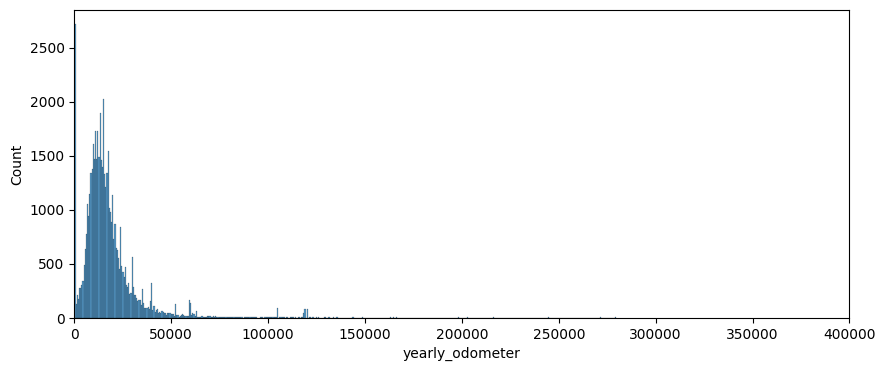

In [113]:
# gaussian distribution of yearly_odometer
plt.figure(figsize=(10,4))
sns.histplot(df['yearly_odometer'])
plt.xlim(0, 400000)

**Findings**

From the above diagram, it is known that the distribution of the "odometer" column is close to normal, but it has some outliers on the right side.

In [87]:
# lower bound of yearly_odometer
yearly_odometer_lower_bound = lower_bound(df, 'yearly_odometer')
yearly_odometer_lower_bound

-6739.0

In [88]:
# upper bound of yearly_odometer
yearly_odometer_upper_bound = upper_bound(df, 'yearly_odometer')
yearly_odometer_upper_bound

37245.0

In [114]:
# the number of outlier data in yearly_odometer variable
outliers_yearly_odometer = df['yearly_odometer'][(df['yearly_odometer'] <= yearly_odometer_lower_bound) | (df['yearly_odometer'] >= yearly_odometer_upper_bound)]
print(outliers_yearly_odometer)
print()
print('The number of outlier data:', len(outliers_yearly_odometer))
print('percentage:', len(outliers_yearly_odometer)/len(df)*100)

4         40452
25       105001
33        37501
41       118866
88        63071
          ...  
51456     49177
51457     40001
51469     38957
51475     78469
51513     38501
Name: yearly_odometer, Length: 3260, dtype: int64

The number of outlier data: 3260
percentage: 6.327025715672003


**Findings**

Outlier data in yearly_odometer variable is 3260 rows, which is 6.32 of the total rows.

#### Dataset with outliers

In [90]:
df[(df['price'] <= price_lower_bound) | (df['price'] >= price_upper_bound) | (df['car_age'] <= car_age_lower_bound) | (df['car_age'] >= car_age_upper_bound) | (df['yearly_odometer'] <= yearly_odometer_lower_bound) | (df['yearly_odometer'] >= yearly_odometer_upper_bound)]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,...,days_listed,date_last_posted,car_age,yearly_odometer,value_condition,days,week,month,year,car_brand
4,14900.0,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,...,28,2019-04-30,2,40452,3,1,04,4,2019,Chrysler
25,11499.0,2017,chevrolet malibu,like new,4,gas,105000.0,automatic,sedan,unknown,...,43,2018-09-07,1,105001,4,3,07,7,2018,Chevrolet
33,3890.0,2011,subaru outback,excellent,4,gas,300000.0,automatic,SUV,white,...,31,2019-01-25,8,37501,3,1,12,12,2018,Subaru
41,11995.0,2017,nissan rogue,like new,4,gas,118865.0,automatic,SUV,silver,...,21,2018-10-11,1,118866,4,3,09,9,2018,Nissan
42,34900.0,2013,mercedes-benz benze sprinter 2500,excellent,6,diesel,123362.0,automatic,van,black,...,16,2019-01-31,6,20561,3,1,01,1,2019,Mercedes-Benz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51463,35500.0,2015,gmc sierra 2500hd,good,8,diesel,106973.0,automatic,truck,black,...,15,2018-05-19,3,35658,2,4,05,5,2018,GMC
51467,38995.0,2014,ram 2500,excellent,6,diesel,111623.0,automatic,truck,white,...,64,2018-07-06,4,27906,3,3,05,5,2018,Ram
51469,21500.0,2015,jeep grand cherokee laredo,excellent,6,gas,116869.0,automatic,SUV,unknown,...,89,2018-11-30,3,38957,3,6,09,9,2018,Jeep
51475,17980.0,2017,subaru outback,excellent,4,gas,78468.0,automatic,SUV,white,...,9,2018-11-25,1,78469,3,4,11,11,2018,Subaru


**Outlier data percentage:**

5502 / 51525 = 10.67%

### 2.7 Dataset without outliers <a id='dataset_without_outliers'></a>

due to the number of outlier data is small (10.67), we will create a new dataset without outliers

In [115]:
df_without_outliers = df[~((df['price'] <= price_lower_bound) | (df['price'] >= price_upper_bound) | (df['car_age'] <= car_age_lower_bound) | (df['car_age'] >= car_age_upper_bound) | (df['yearly_odometer'] <= yearly_odometer_lower_bound) | (df['yearly_odometer'] >= yearly_odometer_upper_bound))]
df_without_outliers

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,...,days_listed,date_last_posted,car_age,yearly_odometer,value_condition,days,week,month,year,car_brand
0,9400.0,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,...,19,2018-07-12,7,20715,2,5,06,6,2018,BMW
1,25500.0,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,...,50,2018-12-08,7,12673,2,4,10,10,2018,Ford
2,5500.0,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,...,79,2019-04-27,6,18334,4,3,02,2,2019,Hyundai
3,1500.0,2003,ford f-150,fair,8,gas,118622.0,automatic,pickup,unknown,...,9,2019-03-31,16,7414,1,4,03,3,2019,Ford
5,14990.0,2014,chrysler 300,excellent,6,gas,57954.0,automatic,sedan,black,...,15,2018-07-05,4,14489,3,2,06,6,2018,Chrysler
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249.0,2013,nissan maxima,like new,6,gas,88136.0,automatic,sedan,black,...,37,2018-11-09,5,17628,4,2,10,10,2018,Nissan
51521,2700.0,2002,honda civic,salvage,4,gas,181500.0,automatic,sedan,white,...,22,2018-12-06,16,11344,0,2,11,11,2018,Honda
51522,3950.0,2009,hyundai sonata,excellent,4,gas,128000.0,automatic,sedan,blue,...,32,2018-12-17,9,14223,3,3,11,11,2018,Hyundai
51523,7455.0,2013,toyota corolla,good,4,gas,139573.0,automatic,sedan,black,...,71,2018-09-11,5,27915,2,0,07,7,2018,Toyota


### 2.8 Compare the diagram for dataset with outliers and without outliers <a id='diagram_2_datasets'></a>

#### price variable

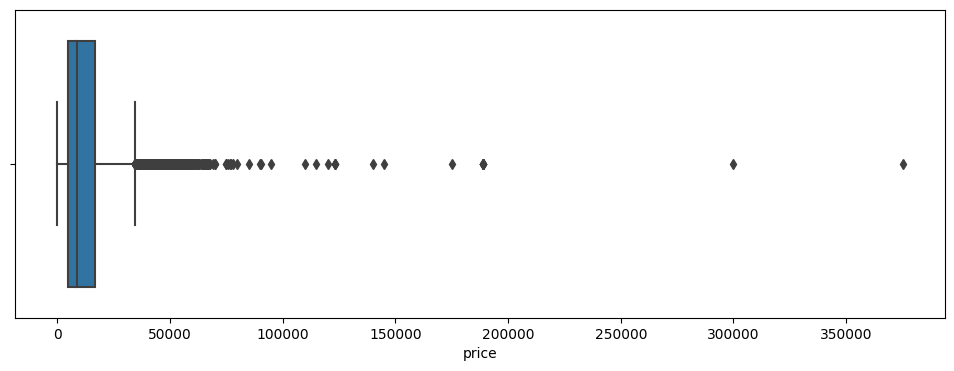

In [92]:
# boxplot in dataset with outliers
plt.figure(figsize=(12,4))
sns.boxplot(x="price", data=df)
plt.show()

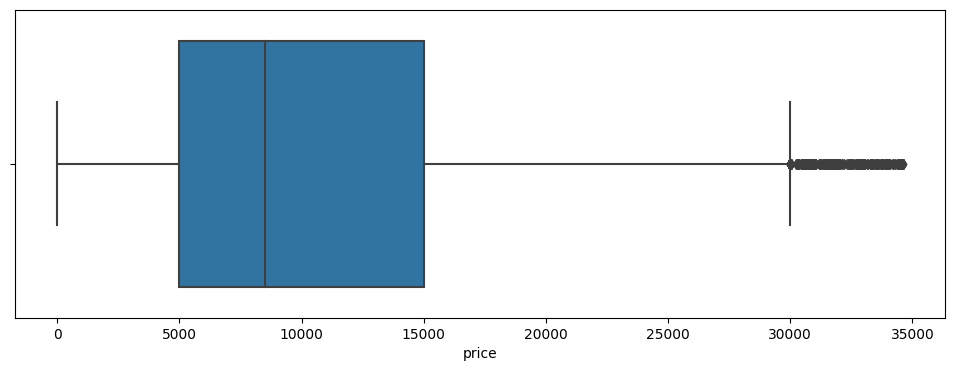

In [93]:
# boxplot in dataset without outliers
plt.figure(figsize=(12,4))
sns.boxplot(x="price", data=df_without_outliers)
plt.show()

<Axes: xlabel='price', ylabel='Count'>

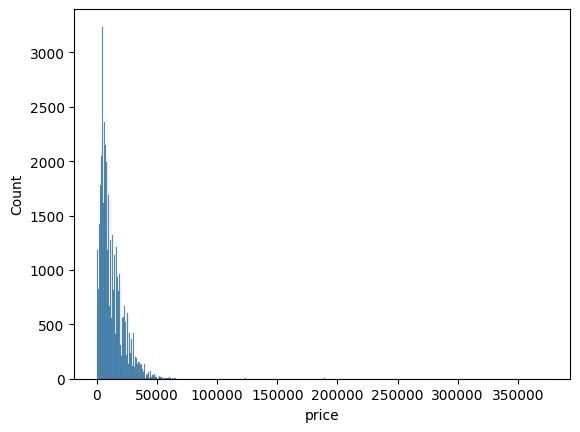

In [94]:
# gaussian distribution in dataset with outliers
sns.histplot(df['price'])

<Axes: xlabel='price', ylabel='Count'>

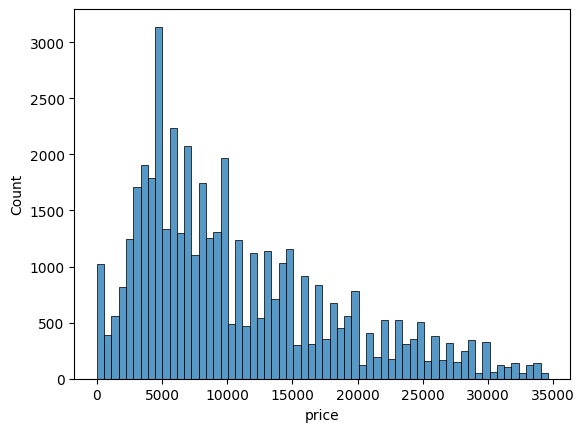

In [95]:
# gaussian distribution in dataset without outliers
sns.histplot(df_without_outliers['price'])

#### car_age variable

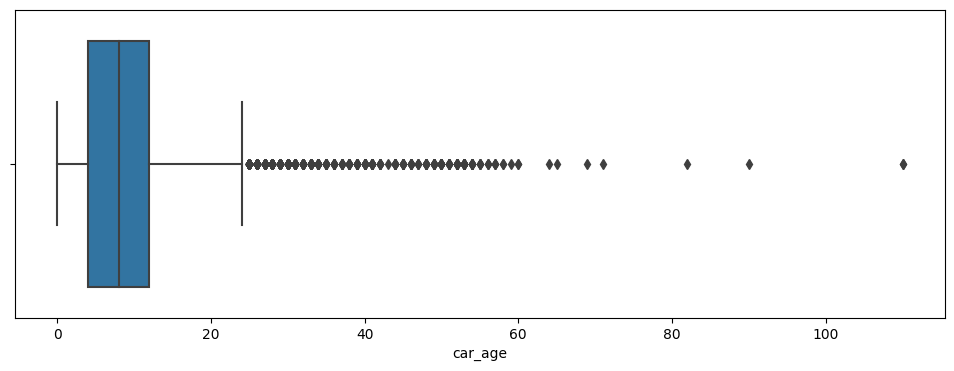

In [96]:
# boxplot in dataset with outliers
plt.figure(figsize=(12,4))
sns.boxplot(x="car_age", data=df)
plt.show()

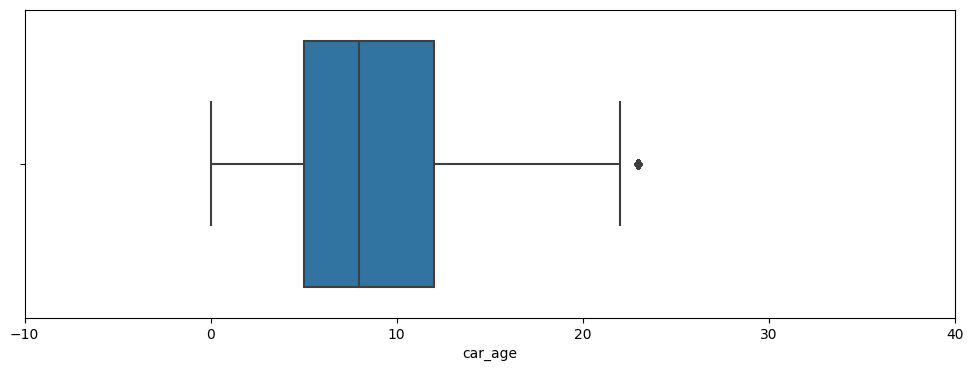

In [97]:
# boxplot in dataset without outliers
plt.figure(figsize=(12,4))
sns.boxplot(x="car_age", data=df_without_outliers)
plt.xlim(-10,40)
plt.show()

<Axes: xlabel='car_age', ylabel='Count'>

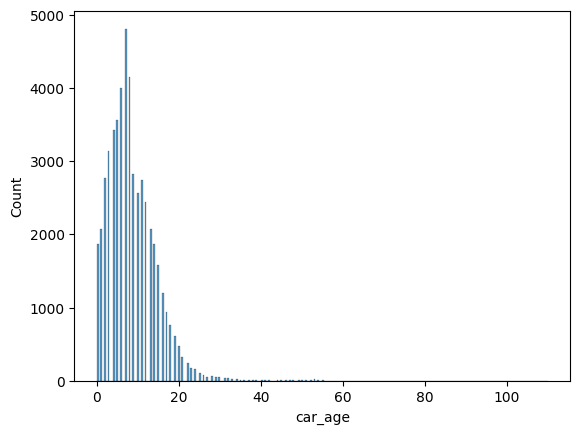

In [98]:
# gaussian distribution in dataset with outliers
sns.histplot(df['car_age'])

<Axes: xlabel='car_age', ylabel='Count'>

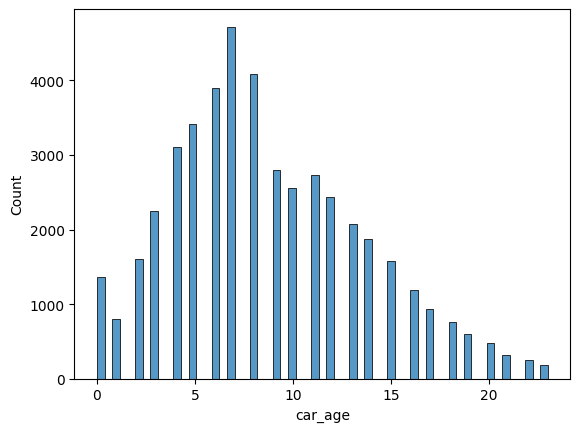

In [99]:
# gaussian distribution in dataset without outliers
sns.histplot(df_without_outliers['car_age'])

#### yearly_odometer variable

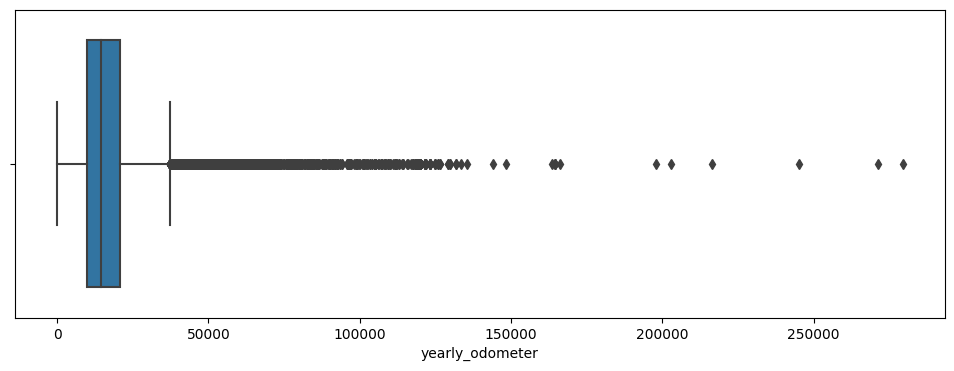

In [100]:
# boxplot in dataset with outliers
plt.figure(figsize=(12,4))
sns.boxplot(x="yearly_odometer", data=df)
plt.show()

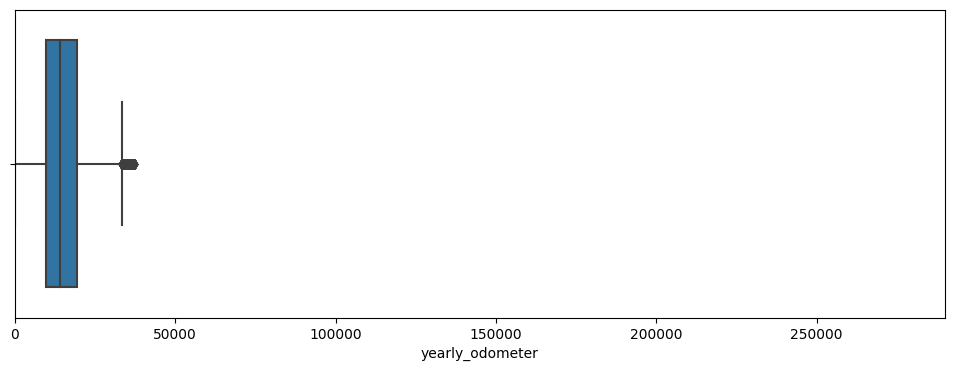

In [101]:
# boxplot in dataset without outliers
plt.figure(figsize=(12,4))
sns.boxplot(x="yearly_odometer", data=df_without_outliers)
plt.xlim(0, 290000)
plt.show()

<Axes: xlabel='yearly_odometer', ylabel='Count'>

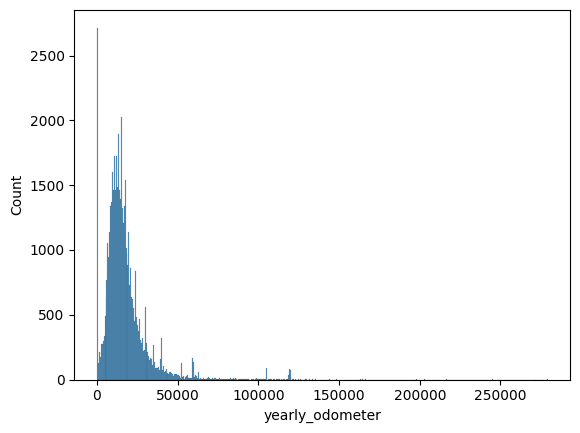

In [102]:
# gaussian distribution in dataset with outliers
sns.histplot(df['yearly_odometer'])

<Axes: xlabel='yearly_odometer', ylabel='Count'>

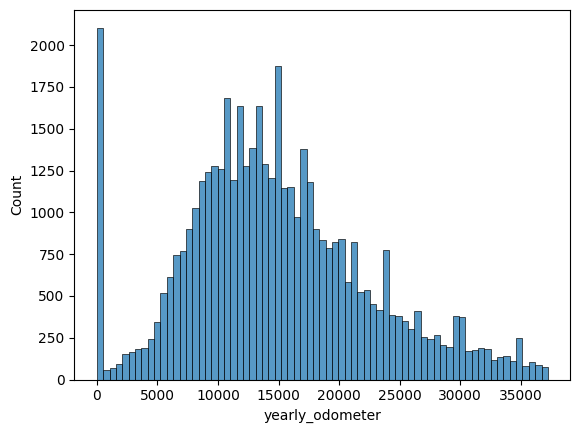

In [103]:
# gaussian distribution in dataset without outliers
sns.histplot(df_without_outliers['yearly_odometer'])

#### Conclusion of Outlier Data

From the comparison of the diagrams in the dataset with outliers and the dataset without outliers, it can be seen that the outlier data points have been removed.

## 3 Data Analysis <a id='analyze'></a>

[Back to Contents](#back)

### 3.1 Ad Duration <a id='ad_duration'></a>

In this process, I will do the following step:
1. Analyze how long ads are displayed (days_listed)
2. Calculate the mean and median. Explain how long ads are usually displayed. 
3. Determine when ads are removed quickly and when they are displayed for a very long time.

In [116]:
ad_duration = pd.pivot_table(data = df_without_outliers, index = 'type', values = 'days_listed', aggfunc=('min','max','mean','median', 'count')).sort_values(by='count')
ad_duration

,count,max,mean,median,min
type,,,,,
bus,21,92,44.619048,49.0,7
offroad,177,233,40.542373,32.0,1
other,226,151,36.867257,31.5,4
convertible,332,181,37.936747,33.0,0
van,556,185,40.147482,33.0,0
hatchback,964,267,40.811203,35.0,0
mini-van,1085,173,39.281106,33.0,0
wagon,1464,240,40.808743,34.0,1
coupe,1964,256,39.465886,33.0,0


**Analysis Result**

1. The average days_listed or ad duration for all types of vehicles is almost the same, ranging from 38 to 43 days.
2. Some ads are removed quickly within 0 days. This could happen when the car is sold on the same day the ad was posted. The vehicle types with the fastest ad removal time of 0 days are mini-van, van, convertible, pickup, SUV, coupe, truck, hatchback, and sedan.
3. The longest ad duration is 271 days, observed for sedan type vehicles.

### 3.2 Average Price for Each Vehicle Type <a id='avg_price'></a>

In this process, I will do the following step:
1. Analyze the number of ads and the average price for each vehicle type. 
2. Visualize the relationship between the number of ads and vehicle types. 
3. Select two vehicle types with the highest number of ads.

In [117]:
avg_price = pd.pivot_table(data = df_without_outliers, index = 'type', values = 'price', aggfunc=('mean','median', 'count')).sort_values('count')
avg_price

,count,mean,median
type,,,
bus,21,18107.428571,28990.0
offroad,177,13709.700565,12000.0
other,226,10166.960177,8925.0
convertible,332,12879.840361,12980.0
van,556,8554.131295,6999.0
hatchback,964,6590.374481,5850.0
mini-van,1085,7702.268203,5995.0
wagon,1464,8596.299863,6999.0
coupe,1964,13212.585540,12000.0


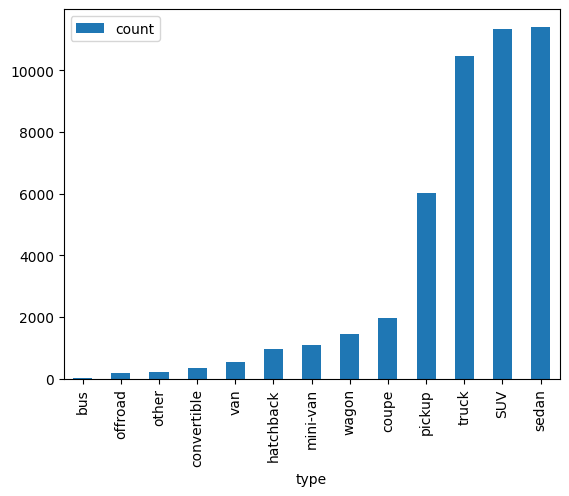

In [118]:
# Graph to show the relationship between the number of ads and vehicle types
avg_price.sort_values(by='count', ascending=True, inplace=True)
avg_price.reset_index().plot(x='type', y='count', kind = 'bar')
plt.show()

**Analysis Result**

1. The most advertised vehicle types are SUV and sedan.
2. The highest average price is found in the Bus vehicle type.
3. However, the number of ads does not have an impact on the price, as the average price for Sedan is 6965, the average price for SUV is 11149, and the average price for Truck is 16734.

### 3.3 Most influential factor on the vehicle's price <a id='influential_factors'></a>

In this process, I will do the following steps:
1. Take each popular vehicle type found in the previous steps and investigate whether its price depends on age, mileage, condition, transmission type, and color.
2. Create boxplots for categorical variables (transmission type and color), and scatterplots for the rest. For categorical variable, I will ensure that each category should have at least 50 ads. Otherwise, the parameter won't be valid for analysis.

In [119]:
top2_car_type = df_without_outliers[df_without_outliers.type.isin(['SUV', 'sedan'])]
top2_car_type

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,...,days_listed,date_last_posted,car_age,yearly_odometer,value_condition,days,week,month,year,car_brand
0,9400.0,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,...,19,2018-07-12,7,20715,2,5,06,6,2018,BMW
2,5500.0,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,...,79,2019-04-27,6,18334,4,3,02,2,2019,Hyundai
5,14990.0,2014,chrysler 300,excellent,6,gas,57954.0,automatic,sedan,black,...,15,2018-07-05,4,14489,3,2,06,6,2018,Chrysler
6,12990.0,2015,toyota camry,excellent,4,gas,79212.0,automatic,sedan,white,...,73,2019-03-10,4,19804,3,3,12,12,2018,Toyota
7,15990.0,2013,honda pilot,excellent,6,gas,109473.0,automatic,SUV,black,...,68,2019-03-16,6,18246,3,0,01,1,2019,Honda
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249.0,2013,nissan maxima,like new,6,gas,88136.0,automatic,sedan,black,...,37,2018-11-09,5,17628,4,2,10,10,2018,Nissan
51521,2700.0,2002,honda civic,salvage,4,gas,181500.0,automatic,sedan,white,...,22,2018-12-06,16,11344,0,2,11,11,2018,Honda
51522,3950.0,2009,hyundai sonata,excellent,4,gas,128000.0,automatic,sedan,blue,...,32,2018-12-17,9,14223,3,3,11,11,2018,Hyundai
51523,7455.0,2013,toyota corolla,good,4,gas,139573.0,automatic,sedan,black,...,71,2018-09-11,5,27915,2,0,07,7,2018,Toyota


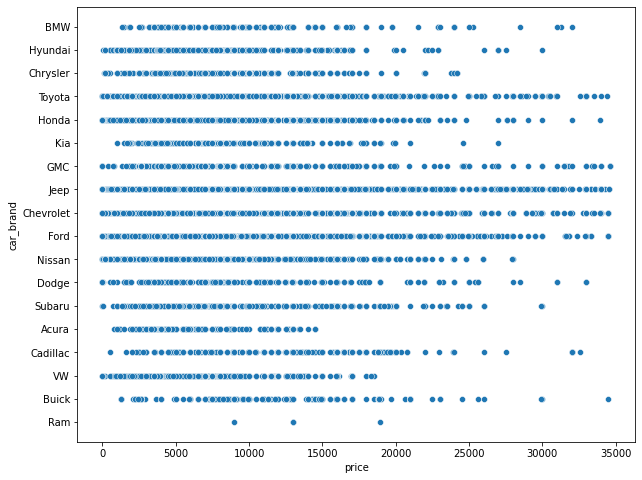

In [ ]:
#  the relationship between price and car_brand
plt.figure(figsize=(10,8))
sns.scatterplot(data=top2_car_type, x="price", y="car_brand")
plt.show()

**Analysis Result**

From the above graph, it can be observed that the price distribution for car brands in the two most popular types is evenly spread, but tends to be concentrated in the range of 0 - 20000.

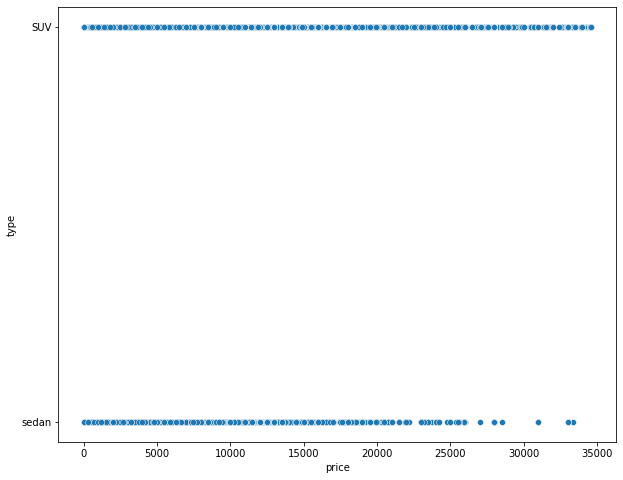

In [ ]:
# the relationship between price and type
plt.figure(figsize=(10,8))
sns.scatterplot(data=top2_car_type, x="price", y="type")
plt.show()

**Analysis Result**

The highest price is for SUV type.

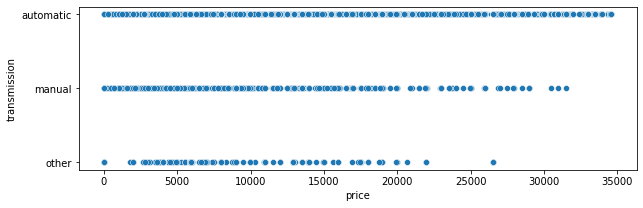

In [ ]:
# the relationship between price and transmission
plt.figure(figsize=(10,3))
sns.scatterplot(data=top2_car_type, x="price", y="transmission")
plt.show()

**Analysis Result**

The highest price is for car with automatic transmission.

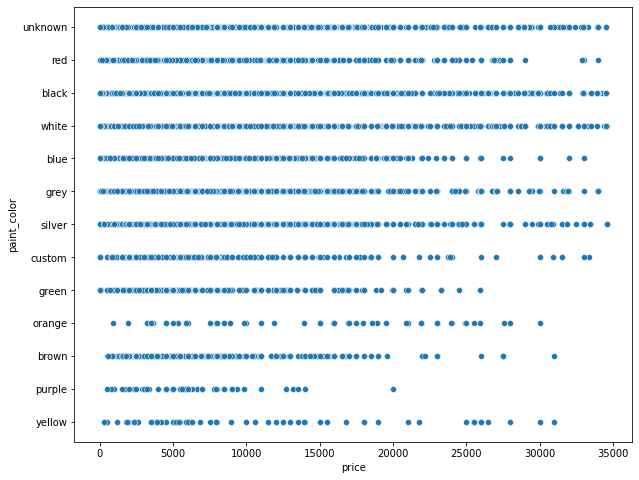

In [ ]:
# the relationship between price and paint_color
plt.figure(figsize=(10,8))
sns.scatterplot(data=top2_car_type, x="price", y="paint_color")
plt.show()

**Analysis Result**

From the above graph, it is known that there is no relationship between the two. The highest price is for cars with the blue color.

## 4. General Conclusion <a id='end'></a>

In this project, we conducted a thorough analysis of the vehicle listings dataset to identify various factors that affect vehicle prices. The dataset underwent several data preprocessing steps to handle missing values, outliers, and data type corrections. We also created additional tables to aid in the analysis.

**Data Preprocessing Steps:**
1. Analyzing patterns of missing values
2. Filling in missing values
4. Fixing incorrect data types
4. Analyzing outliers
5. Removing outliers

**Exploratory Data Analysis:**
1. Analyzing the differences between the dataset with outliers and dataset without outliers
2. Creating new datasets to assist in the analysis
3. Using correlation matrices to understand relationships between numeric variables
4. Using scatter plots to explore relationships between numeric (price) and categorical variables

**Correlations between numeric variables:**
1. There are correlations between the following variables:

    a. Model Year and Price > positively correlated   

    b. Model Year and Odometer > negatively correlated

    c. Price and Odometer > negatively correlated

    d. Cylinders and is_4wd > positively correlated

    e. is_4wd and Price > positively correlated

    f. Value_condition and Price > positively correlated
    
    g. Value_condition and Model_year > positively correlated

**Relationship between price and categorical variables:**
1. The highest price is owned by vehicles with the brand Nissan.
2. The highest price is owned by pickup type vehicles.
3. The highest price is owned by vehicles with automatic transmission.
4. The highest price is owned by vehicles with the color blue.

[Back to Contents](#back)